In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import seaborn as sns
from ast import literal_eval
from collections import Counter
from sklearn.preprocessing import MinMaxScaler

In [2]:
plt.style.use('ggplot')

In [3]:
plt.style.use('seaborn-bright')

In [4]:
user_profile = pd.read_csv("data/user_profile/prepared/User_Profile_Reduced_Socio_features_with_clusters.csv")

In [5]:
user_profile.drop(["Unnamed: 0","Subscription"],axis=1,inplace=True)

## Filling null values

In [6]:
cat_cols = ["BB_Categorical","PEO_TV_Categorical","IDD_INCOMING_Categorical","IDD_OUTGOING_Categorical",
            "ONNET_OUTGOING_Categorical","OFFNET_OUTGOING_Categorical","ONNET_INCOMING_Categorical",
            "Sub_Update_Status","Sub_Update",
            "OFFNET_INCOMING_Categorical","IDD_incoming_country","IDD_outgoing_country","IDD_Overall_Categorical",
            "Location_Identifier","GENDER","Voice_VAS_Month_Subscribed","BB_VAS_Month_Subscribed", "VOICE_Categorical",
            "Peo_VAS_Month_Subscribed","Other_VAS_Month_Subscribed","BB_Extra_GB_Purchase_Categorical",
            "Peo_TV_Package","Voice_VAS_Package","BB_VAS_Package","Other_VAS_Package",
            "Having_Insurance","Having_Senior_Citizen","Having_Kids_at_Home","Having_Teenagers_Students",
            "Having_Working_Professionals","Having_Family_Member_Abroad","Tamil_Customer"]

In [7]:
user_profile[cat_cols]= user_profile[cat_cols].fillna("NO_INFO")

### Cluster Counts

In [8]:
user_profile["H_5_Cluster"].value_counts()

2    721
3    711
4    577
0    503
1    488
Name: H_5_Cluster, dtype: int64

In [9]:
user_profile["H_5_Cluster"].value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.1f%%')

<AxesSubplot:ylabel='H_5_Cluster'>

# Cluster analysis - Cluster 3

In [10]:
cluster_3 = user_profile[(user_profile["H_5_Cluster"]==3)]

In [11]:
cluster_3.describe()

ONNET_OUTGOING_Scaled  ONNET_INCOMING_Scaled  OFFNET_OUTGOING_Scaled  \
count             711.000000             687.000000              691.000000   
mean                0.083430               0.087670                0.090834   
std                 0.079714               0.083612                0.087262   
min                 0.001202               0.001202                0.001202   
25%                 0.020138               0.020003                0.023021   
50%                 0.055779               0.058036                0.065640   
75%                 0.125331               0.135560                0.132248   
max                 0.521929               0.508242                0.643887   

       OFFNET_INCOMING_Scaled  IDD_INCOMING_Scaled  IDD_OUTGOING_Scaled  \
count              701.000000           293.000000            54.000000   
mean                 0.103897             0.059626             0.065616   
std                  0.084984             0.112645             0.090618   
min                  0.001202             0.002500             0.004808   
25%                  0.031389             0.005000             0.019231   
50%                  0.088076             0.015000             0.032051   
75%                  0.155514             0.058500             0.073718   
max                  0.589596             0.810500             0.511218   

       IDD_outgoing_Cumulative_Revenue  PEO_TV_Scaled   BB_Scaled  \
count                     5.400000e+01     692.000000  407.000000   
mean                      6.049892e+05       0.640995    0.359678   
std                       1.864350e+06       0.269584    0.241194   
min                       1.500000e+03       0.000000    0.005208   
25%                       4.117500e+04       0.475000    0.159722   
50%                       1.378165e+05       0.700000    0.324653   
75%                       3.684918e+05       0.862500    0.533854   
max                       1.342376e+07       0.975000    1.000000   

        BIRTH_YEAR  ...  Peo_Packages_if_Kids  \
count   609.000000  ...            711.000000   
mean   1965.868637  ...              0.000281   
std      15.296924  ...              0.007501   
min    1900.000000  ...              0.000000   
25%    1955.000000  ...              0.000000   
50%    1966.000000  ...              0.000000   
75%    1977.000000  ...              0.000000   
max    2000.000000  ...              0.200000   

       Peo_Packages_if_Teenager_Students  \
count                         711.000000   
mean                            0.002532   
std                             0.022375   
min                             0.000000   
25%                             0.000000   
50%                             0.000000   
75%                             0.000000   
max                             0.200000   

       Peo_Package_if_Working_Professionals  VAS_if_Kids  \
count                            711.000000   711.000000   
mean                               0.007032     0.003094   
std                                0.036864     0.038147   
min                                0.000000     0.000000   
25%                                0.000000     0.000000   
50%                                0.000000     0.000000   
75%                                0.000000     0.000000   
max                                0.200000     0.500000   

       VAS_if_Teenager_Students  VAS_if_Working_Professionals  \
count                711.000000                    711.000000   
mean                   0.046976                      0.042475   
std                    0.113900                      0.099167   
min                    0.000000                      0.000000   
25%                    0.000000                      0.000000   
50%                    0.000000                      0.000000   
75%                    0.000000                      0.000000   
max                    0.600000                      0.500000   

       IDD_if_Family_Member_Abr

#### Exceptional (Outlier Usage)

<AxesSubplot:>

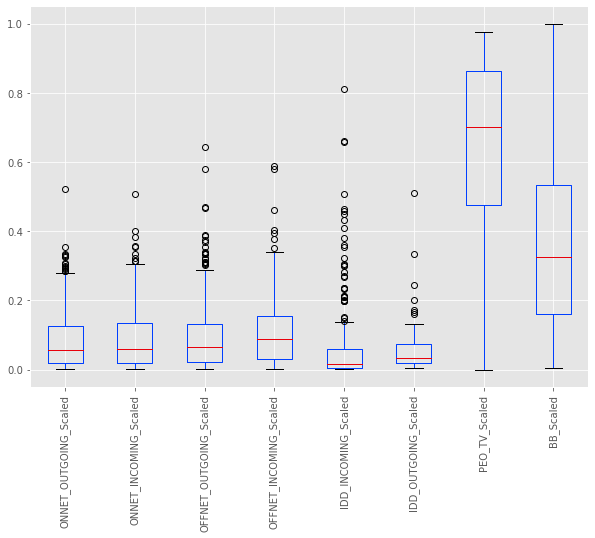

In [12]:
cluster_3.iloc[:,[4,7,10,13,16,20,26,28,62]].boxplot(figsize=(10,7),rot=90)

### Exceptional Users (Outliers) analysis

In [13]:
out_cols = ["ONNET_OUTGOING_Outlier","ONNET_INCOMING_Outlier","OFFNET_OUTGOING_Outlier","OFFNET_INCOMING_Outlier","IDD_INCOMING_Outlier","IDD_OUTGOING_Outlier"]
scaled_cols=["ONNET_OUTGOING_Scaled","ONNET_INCOMING_Scaled","OFFNET_OUTGOING_Scaled","OFFNET_INCOMING_Scaled","IDD_INCOMING_Scaled","IDD_OUTGOING_Scaled"]

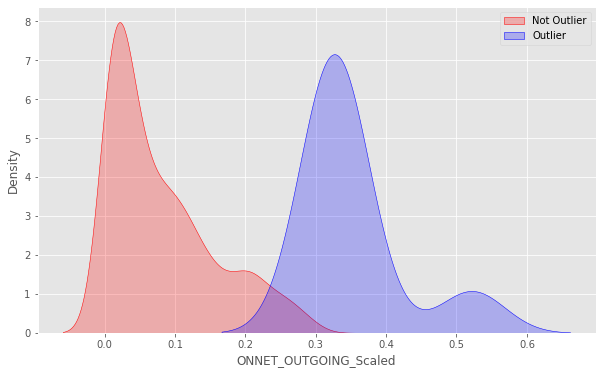

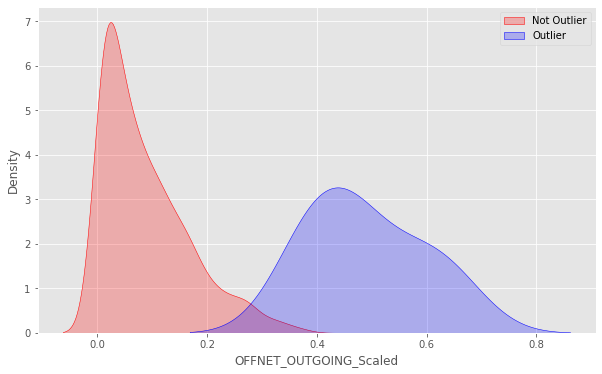

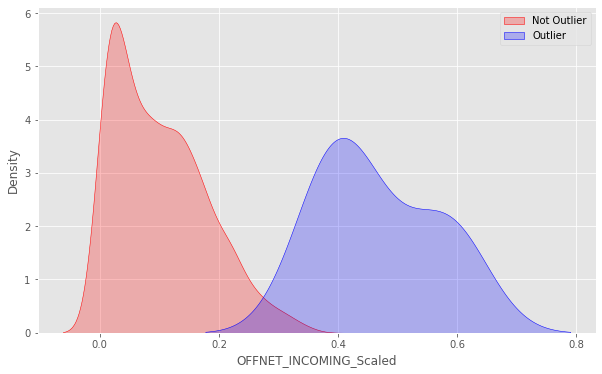

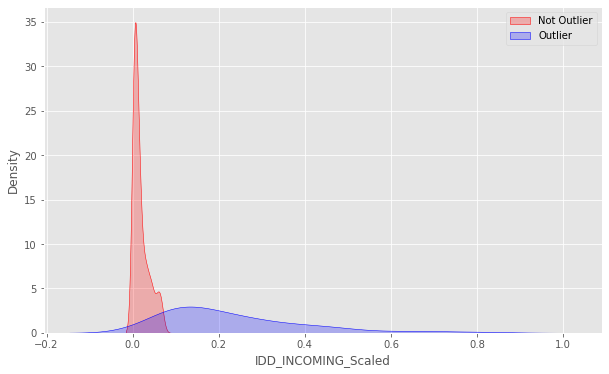

In [14]:
for i in range (0,6):
    plt.figure(figsize=(10,6))
    ax = sns.kdeplot(cluster_3[scaled_cols[i]][(cluster_3[out_cols[i]] == 'NO') ], color="Red", shade = True)
    ax = sns.kdeplot(cluster_3[scaled_cols[i]][(cluster_3[out_cols[i]] == 'YES') ], ax =ax, color="Blue", shade= True)
    ax.legend(["Not Outlier","Outlier"],loc='upper right')
    ax.set_ylabel('Density')

In [15]:
# Voice Outliers
cluster_3_out = cluster_3[(cluster_3["ONNET_OUTGOING_Outlier"]=="YES") | (cluster_3["ONNET_INCOMING_Outlier"]=="YES") | (cluster_3["OFFNET_OUTGOING_Outlier"]=="YES") | (cluster_3["OFFNET_INCOMING_Outlier"]=="YES") | (cluster_3["IDD_OUTGOING_Outlier"]=="YES") | (cluster_3["IDD_INCOMING_Outlier"]=="YES")]

#### Exceptional users -  correlation with other features

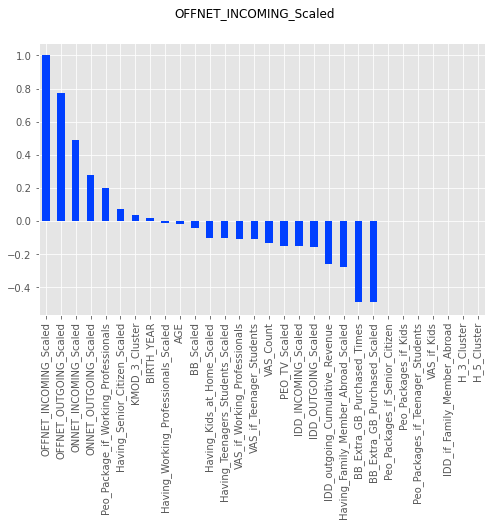

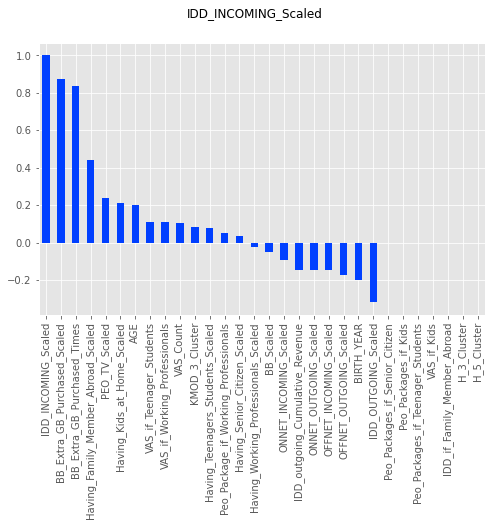

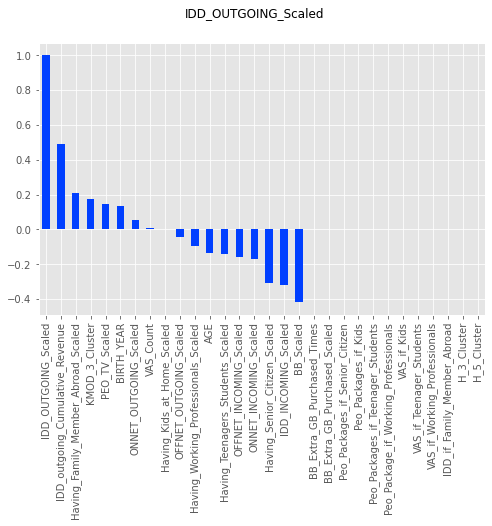

In [16]:
for col in scaled_cols:
    plt.figure(figsize=(8,5))
    plt.suptitle(col)
    cluster_3_out.corr()[col].sort_values(ascending = False).plot(kind='bar')

#### Subscriptions of Exceptional users

In [17]:
cluster_3_out_sub_df = pd.DataFrame([dict(cluster_3["Sub_Type"].value_counts()),dict(cluster_3_out["Sub_Type"].value_counts())])

In [18]:
cluster_3_out_sub_df

TRIPLE_PLAY  DOUBLE_PLAY_PV  DOUBLE_PLAY_BV  SINGLE_PLAY
0          632              62              16          1.0
1           75               4               2          NaN

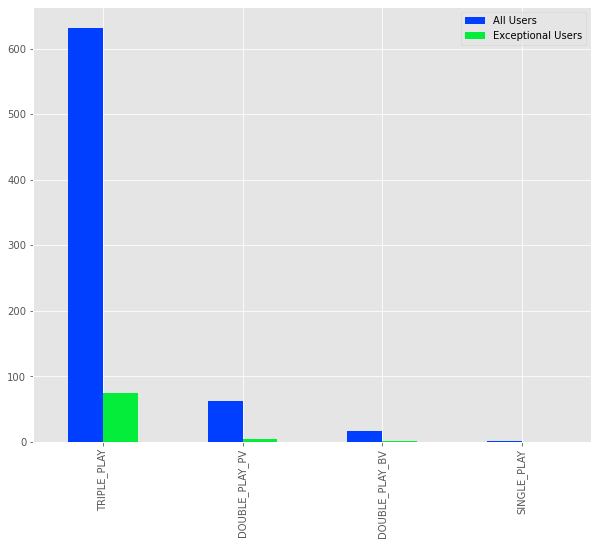

In [19]:
fig, ax = plt.subplots()
cluster_3_out_sub_df.T.plot(kind="bar", figsize=(10,8), ax=ax)
ax.legend(["All Users", "Exceptional Users"])

#### Exceptional Users by Location

<AxesSubplot:xlabel='Location_Identifier'>

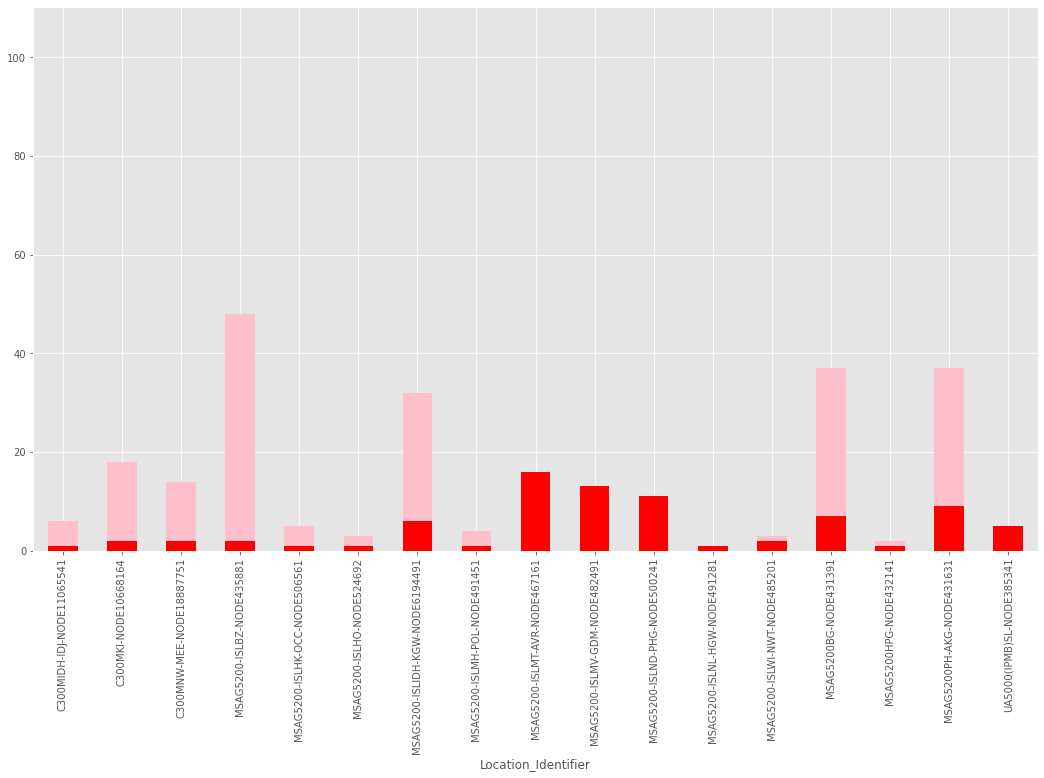

In [20]:
cluster_3_loc = cluster_3.groupby('Location_Identifier').count()["event_source.hash"]
cluster_3_out_loc = cluster_3_out.groupby('Location_Identifier').count()["event_source.hash"]
ax = cluster_3_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="pink")
cluster_3_out_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="red")

#### Skewness and Distribution

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

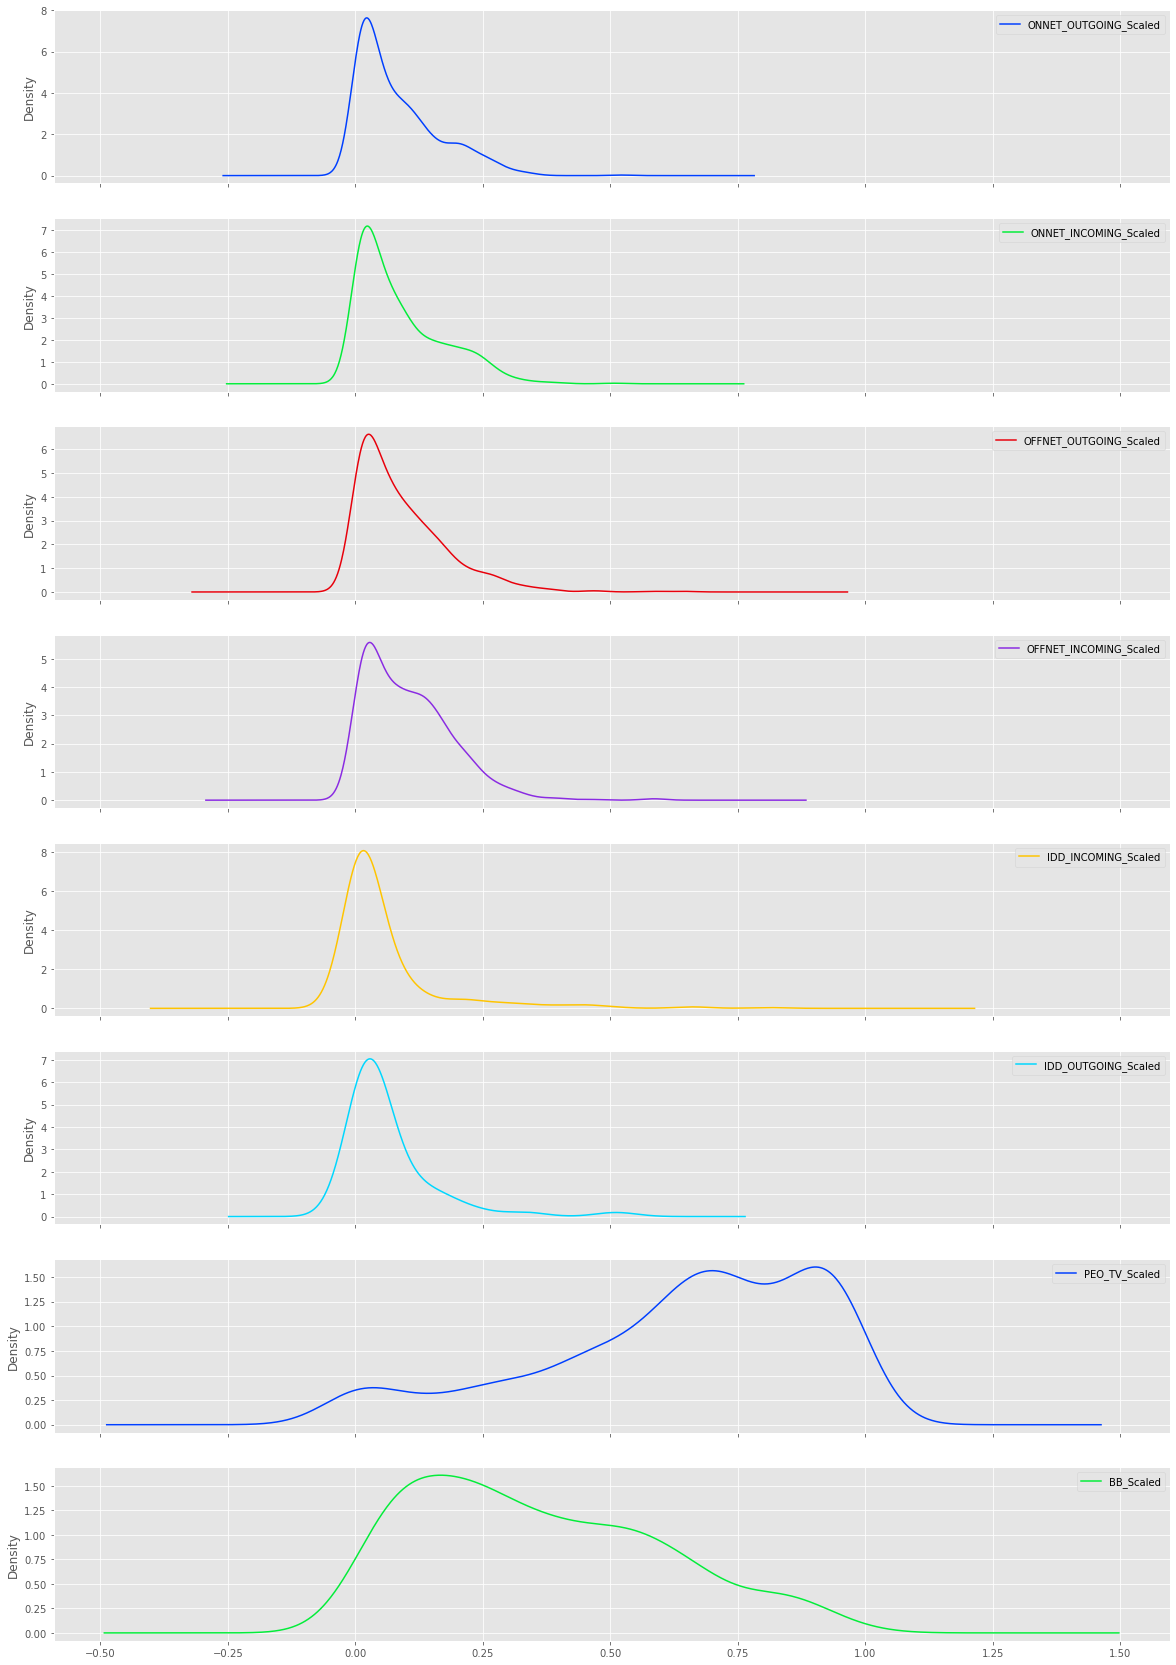

In [21]:
cluster_3.iloc[:,[4,7,10,13,16,20,26,28,62]].plot.kde(figsize=(20,30),subplots=True)

In [22]:
cluster_3.hist(figsize=(15,15))

array([[<AxesSubplot:title={'center':'ONNET_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'ONNET_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'OFFNET_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'OFFNET_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_INCOMING_Scaled'}>],
       [<AxesSubplot:title={'center':'IDD_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_outgoing_Cumulative_Revenue'}>,
        <AxesSubplot:title={'center':'PEO_TV_Scaled'}>,
        <AxesSubplot:title={'center':'BB_Scaled'}>,
        <AxesSubplot:title={'center':'BIRTH_YEAR'}>],
       [<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'VAS_Count'}>,
        <AxesSubplot:title={'center':'BB_Extra_GB_Purchased_Times'}>,
        <AxesSubplot:title={'center':'BB_Extra_GB_Purchased_Scaled'}>,
        <AxesSubplot:title={'center':'Having_Senior_Citizen_Scaled'}>],
       [<AxesSubplot:title={'center':'Having_Kids_at_Home_Scaled'}>,
 

### Subscription Type and Usage

In [23]:
cluster_3["Sub_Type"].value_counts()

TRIPLE_PLAY       632
DOUBLE_PLAY_PV     62
DOUBLE_PLAY_BV     16
SINGLE_PLAY         1
Name: Sub_Type, dtype: int64

<AxesSubplot:ylabel='Sub_Type'>

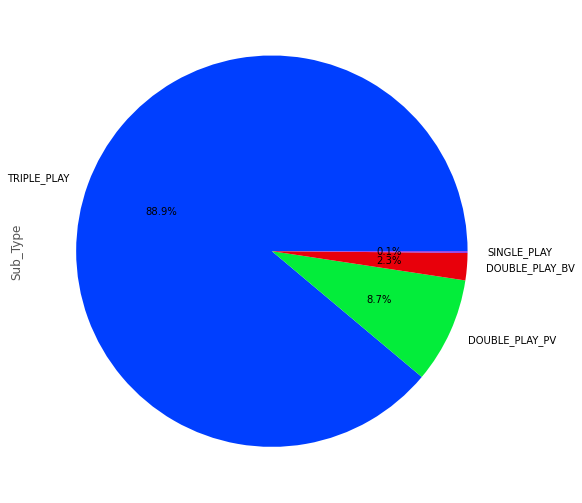

In [24]:
cluster_3["Sub_Type"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%')

In [25]:
len(cluster_3[(cluster_3["Sub_Usage"] != "['VOICE_NO_INFO', 'BB_NO_INFO', 'TV_NO_INFO']")]["Sub_Usage"])

711

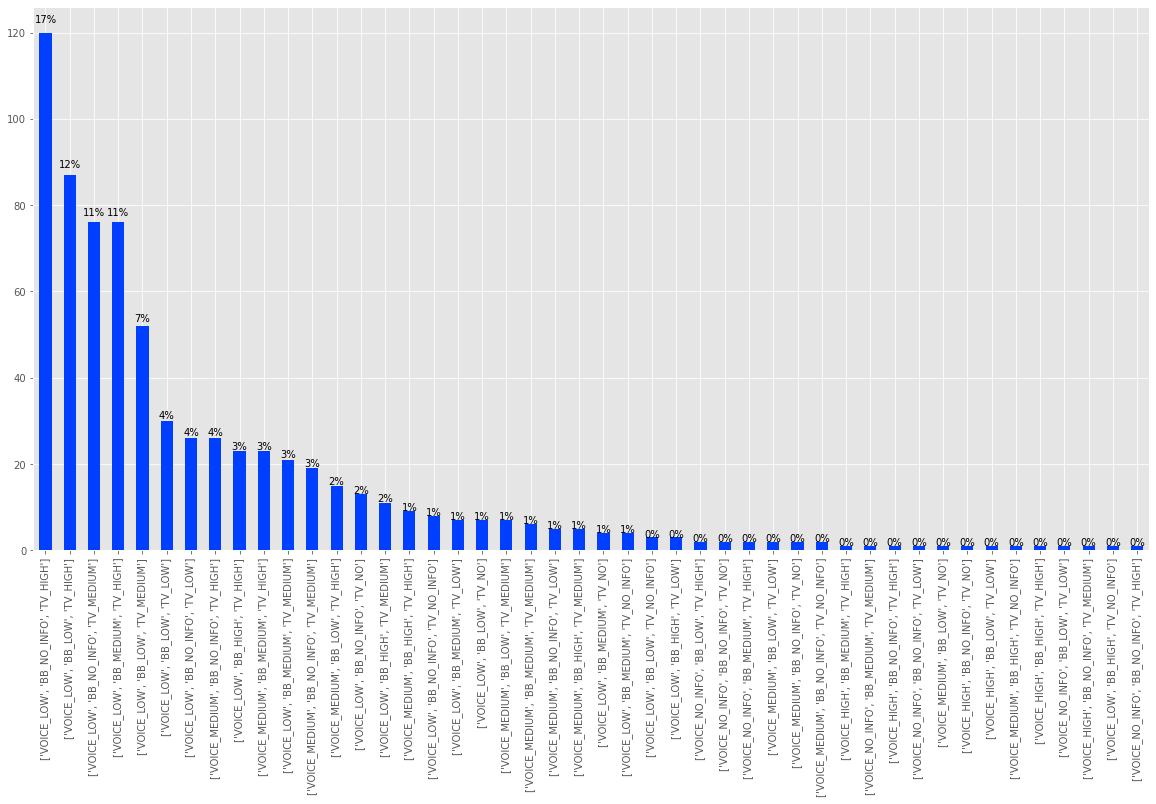

In [26]:
ax =cluster_3[(cluster_3["Sub_Usage"] != "['VOICE_NO_INFO', 'BB_NO_INFO', 'TV_NO_INFO']")]["Sub_Usage"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### Subscription state

####  Subscription: Assumed vs. Actual

<AxesSubplot:ylabel='Sub_Type_State'>

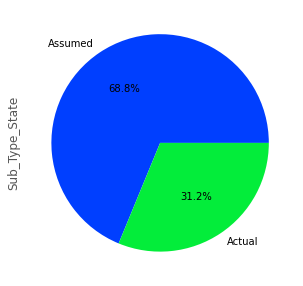

In [27]:
cluster_3["Sub_Type_State"].value_counts().plot(kind='pie', figsize=(5,5), autopct='%1.1f%%')

<AxesSubplot:ylabel='Sub_Update_Status'>

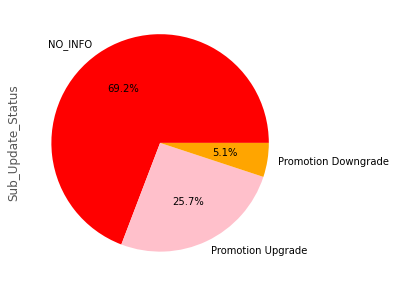

In [28]:
cluster_3["Sub_Update_Status"].value_counts().plot(kind='pie', figsize=(5,5), autopct='%1.1f%%', colors=["red","pink","orange"])

In [29]:
cluster_3[(cluster_3["Sub_Update_Status"]!= "NO_INFO")]["Sub_Update_Status"].value_counts().plot(kind='pie', figsize=(5,5), autopct='%1.1f%%', colors=["red","pink","orange"])

<AxesSubplot:ylabel='Sub_Update_Status'>

<AxesSubplot:ylabel='Sub_Update'>

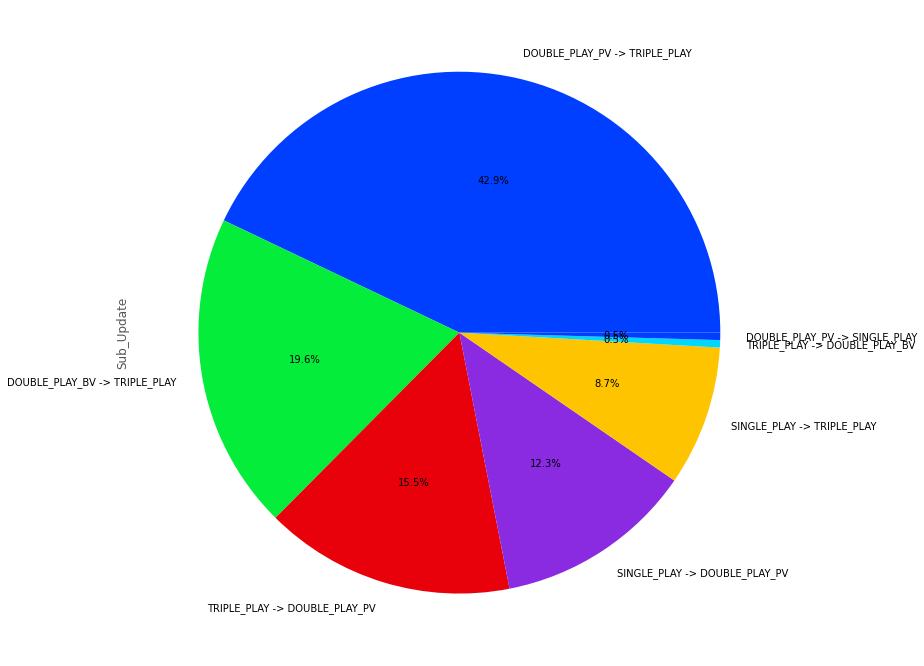

In [31]:
cluster_3[(cluster_3["Sub_Update"] !="NO_INFO")]["Sub_Update"].value_counts().plot(kind='pie', figsize=(12,12), autopct='%1.1f%%')

### Voice Calls Usage

In [32]:
cluster_3["VOICE_Categorical"].value_counts()

LOW        572
MEDIUM     123
NO_INFO     10
HIGH         6
Name: VOICE_Categorical, dtype: int64

<AxesSubplot:ylabel='VOICE_Categorical'>

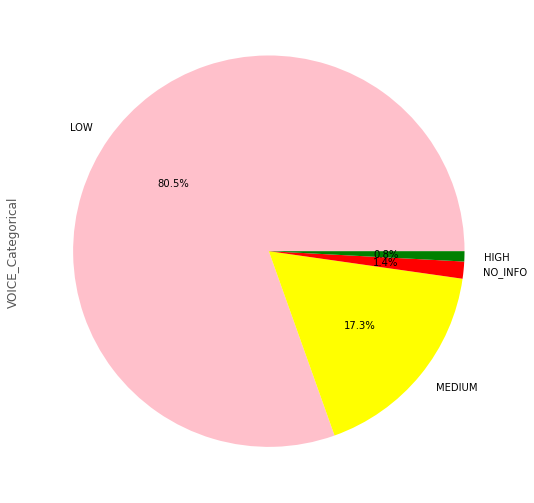

In [34]:
cluster_3["VOICE_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['pink', 'yellow','red','green'] )

### VOICE VAS Packages

In [35]:
count_dict = dict(cluster_3["Voice_VAS_Package"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO_INFO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
all_voice_products_dict = Counter(all_products)

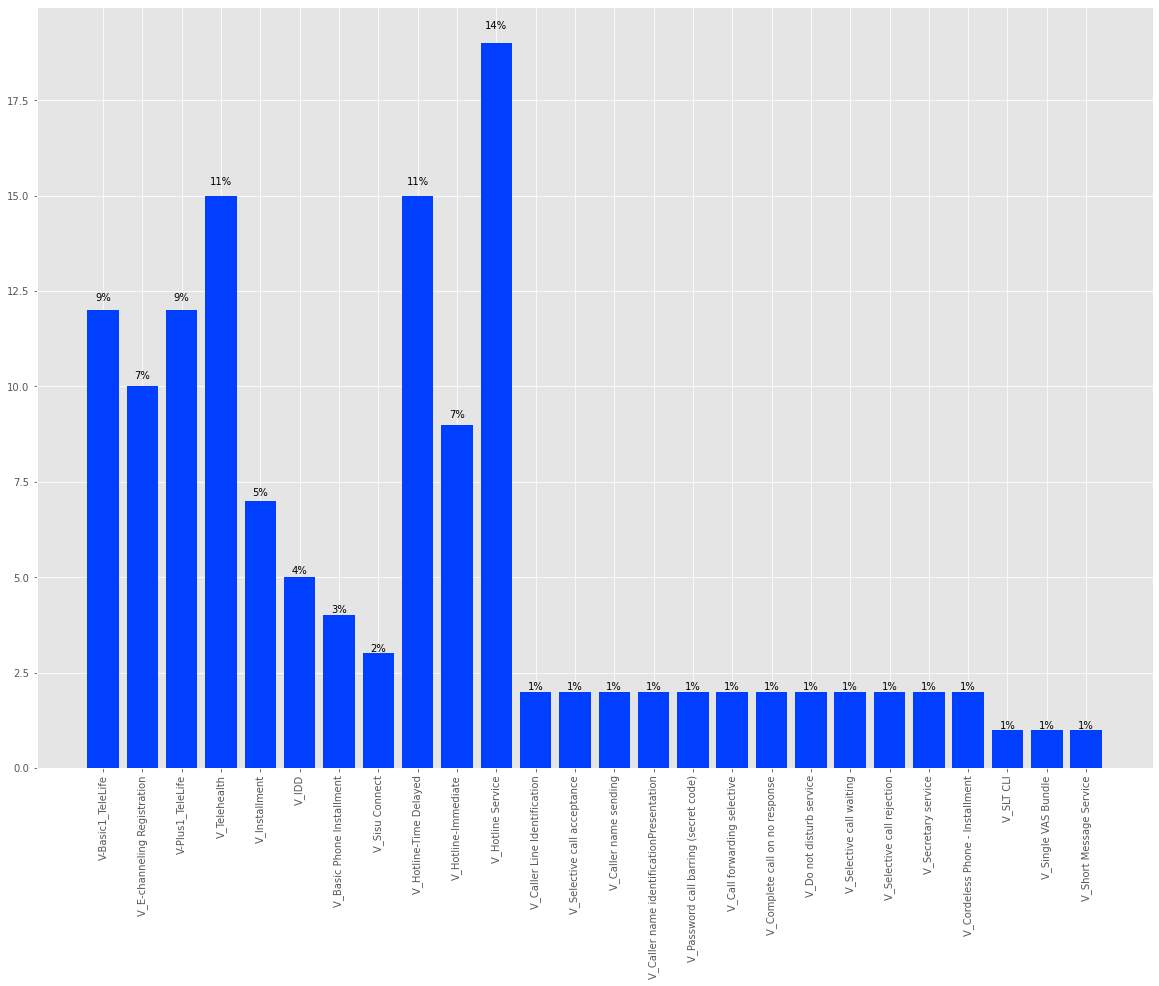

In [36]:
avp_without_no = all_voice_products_dict
#avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(20,14))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

### IDD Usage

In [37]:
cluster_3["IDD_Overall_Categorical"].value_counts()

NO_INFO    407
LOW        304
Name: IDD_Overall_Categorical, dtype: int64

In [39]:
cluster_3["IDD_Overall_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['red','pink','yellow','green'] )

<AxesSubplot:ylabel='IDD_Overall_Categorical'>

#### IDD Calling country analysis

In [40]:
def eval_country(idd_country):
    if not isinstance(idd_country, float):
        if idd_country != "NO_INFO":
            return literal_eval(idd_country)
    else:
        return []

In [41]:
cluster_3_idd_country_df = cluster_3[["event_source.hash","IDD_incoming_country"]]

In [42]:
cluster_3_idd_country_df["IDD_incoming_country"] = cluster_3_idd_country_df["IDD_incoming_country"].apply(lambda x: eval_country(x))

<ipython-input-42-13ed10787a13>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
cluster_3_idd_country_df = cluster_3_idd_country_df.explode("IDD_incoming_country")

In [44]:
cluster_3_idd_country_df["IDD_incoming_country"].value_counts().plot(kind="bar", figsize=(20,10))

<AxesSubplot:>

#### IDD Outgoing Countries

In [45]:
cluster_3_idd_out_country_df = cluster_3[["event_source.hash","IDD_outgoing_country"]]

In [46]:
cluster_3_idd_out_country_df["IDD_outgoing_country"] = cluster_3_idd_out_country_df["IDD_outgoing_country"].apply(lambda x: eval_country(x))

<ipython-input-46-c30094134f3e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
cluster_3_idd_out_country_df = cluster_3_idd_out_country_df.explode("IDD_outgoing_country")

In [48]:
def drop_mobile(idd_country):
    if idd_country is not None:
        if idd_country != "NO_INFO":
            return idd_country.replace(" - Mobile", "")
    else:
        return idd_country

In [49]:
cluster_3_idd_out_country_df["IDD_outgoing_country"] = cluster_3_idd_out_country_df["IDD_outgoing_country"].apply(lambda x: drop_mobile(x))

<AxesSubplot:>

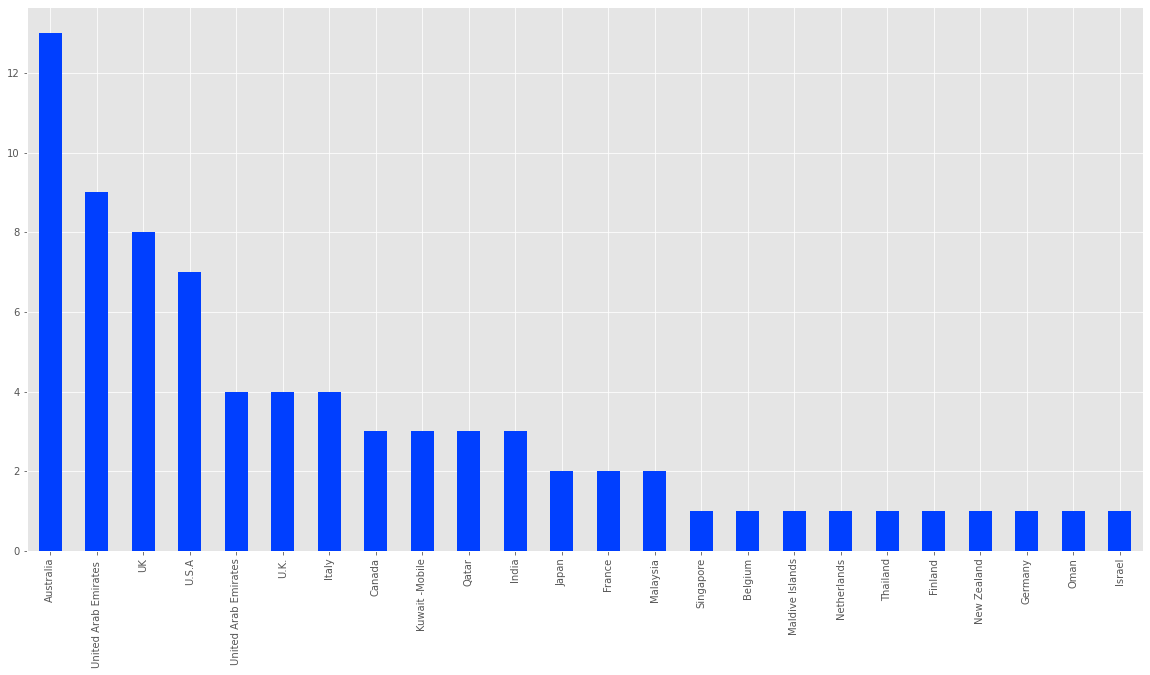

In [50]:
cluster_3_idd_out_country_df["IDD_outgoing_country"].value_counts().plot(kind="bar", figsize=(20,10))

#### IDD Rental anlysis

## ToDo
- Voice VAS Monthly rental/ One time charge/ subscribed timeframes analysis

### PeoTV Usage

In [51]:
cluster_3["PEO_TV_Categorical"].value_counts()

HIGH       387
MEDIUM     199
LOW         76
NO          30
NO_INFO     19
Name: PEO_TV_Categorical, dtype: int64

#### PeoTV Usage among Triple Play users in Cluster 3

In [53]:
cluster_3_peo = cluster_3[(cluster_3["Sub_Type"] == "TRIPLE_PLAY")]
cluster_3_peo["PEO_TV_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['green','yellow','pink','red','orange'])

<AxesSubplot:ylabel='PEO_TV_Categorical'>

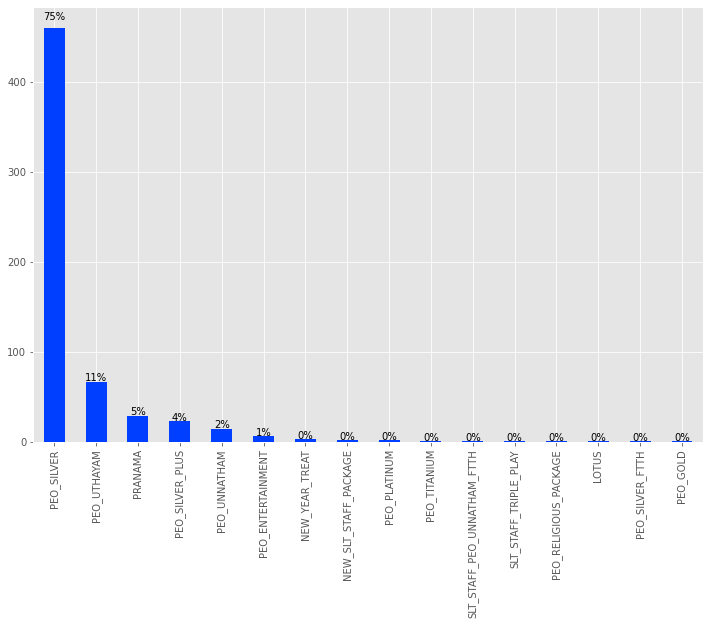

In [55]:
ax =cluster_3_peo[(cluster_3_peo["Peo_TV_Package"] != "NO_INFO")]["Peo_TV_Package"].value_counts().plot(kind='bar', figsize=(12,8))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### PeoTV Usage among Double Play PV users in Cluster 3

<AxesSubplot:ylabel='PEO_TV_Categorical'>

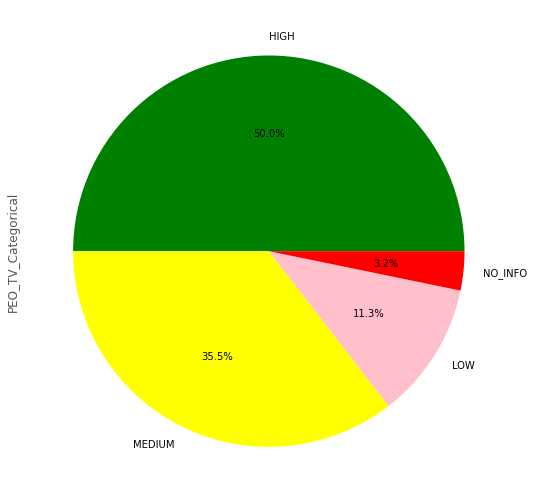

In [57]:
cluster_3_peo_pv = cluster_3[(cluster_3["Sub_Type"] == "DOUBLE_PLAY_PV")]
cluster_3_peo_pv["PEO_TV_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['green','yellow','pink','red','red'])

In [58]:
cluster_3_peo_pv["PEO_TV_Categorical"].value_counts()

HIGH       31
MEDIUM     22
LOW         7
NO_INFO     2
Name: PEO_TV_Categorical, dtype: int64

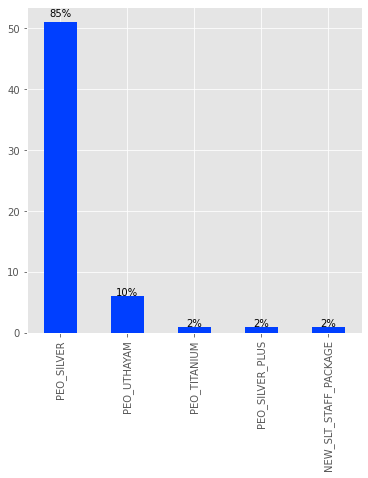

In [59]:
ax =cluster_3_peo_pv[(cluster_3_peo_pv["Peo_TV_Package"] != "NO_INFO")]["Peo_TV_Package"].value_counts().plot(kind='bar', figsize=(6,6))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### PEO TV VAS Packages

In [60]:
count_dict = dict(cluster_3["Peo_VAS_Package"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO_INFO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
all_peo_products_dict = Counter(all_products)

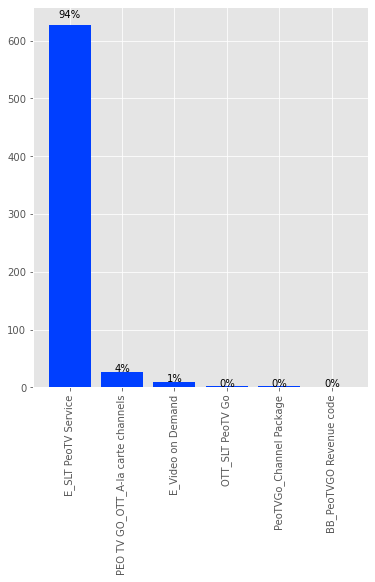

In [61]:
avp_without_no = all_peo_products_dict
#avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(6,7))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

## ToDo
- Peo VAS Monthly rental/ One time charge/ subscribed timeframes analysis

### BroadBand Internet Usage

In [62]:
cluster_3["BB_Categorical"].value_counts()

NO_INFO    304
LOW        208
MEDIUM     145
HIGH        54
Name: BB_Categorical, dtype: int64

#### BB Usage for triple Play users in Cluster 3

In [63]:
cluster_3_bb = cluster_3[(cluster_3["Sub_Type"] == "TRIPLE_PLAY")]
cluster_3_bb["BB_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',colors = ['red','pink','yellow','green'])

<AxesSubplot:ylabel='BB_Categorical'>

#### BB Usage for Double Play BV Customers in Cluster 3

<AxesSubplot:ylabel='BB_Categorical'>

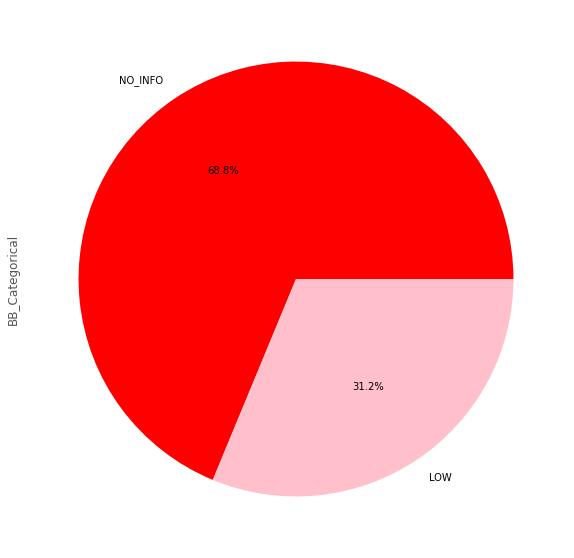

In [64]:
cluster_3_bb_dp = cluster_3[(cluster_3["Sub_Type"] == "DOUBLE_PLAY_BV")]
cluster_3_bb_dp["BB_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',colors = ['red','pink','green','yellow'])

### BB VAS Package

In [65]:
count_dict = dict(cluster_3["BB_VAS_Package"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO_INFO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
all_bb_products_dict = Counter(all_products)

In [66]:
avp_without_no = all_bb_products_dict
#avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(8,10))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

## ToDo
- BB VAS Monthly rental/ One time charge/ subscribed timeframes analysis

### Extra Gb Usage Analysis

#### Most Extra GB Purchased users - by frequency

In [67]:
extra_gb_freq_users = cluster_3[(cluster_3["BB_Extra_GB_Purchased_Scaled"]>0.5)]

In [68]:
extra_gb_mostly_used_users = extra_gb_freq_users["event_source.hash"]

In [69]:
cluster_3["BB_Extra_GB_Purchase_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',colors = ['red','pink','yellow','green'])

<AxesSubplot:ylabel='BB_Extra_GB_Purchase_Categorical'>

## User Location

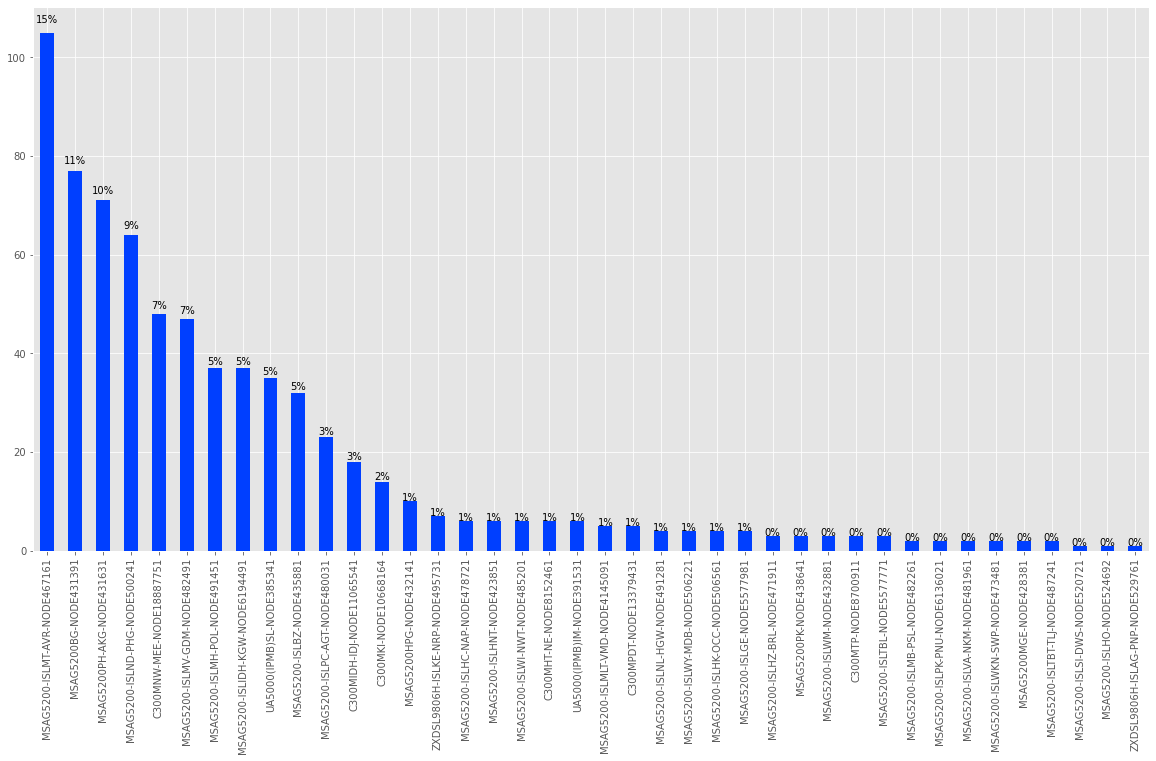

In [71]:
ax =cluster_3["Location_Identifier"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### User locations of Triply play customers

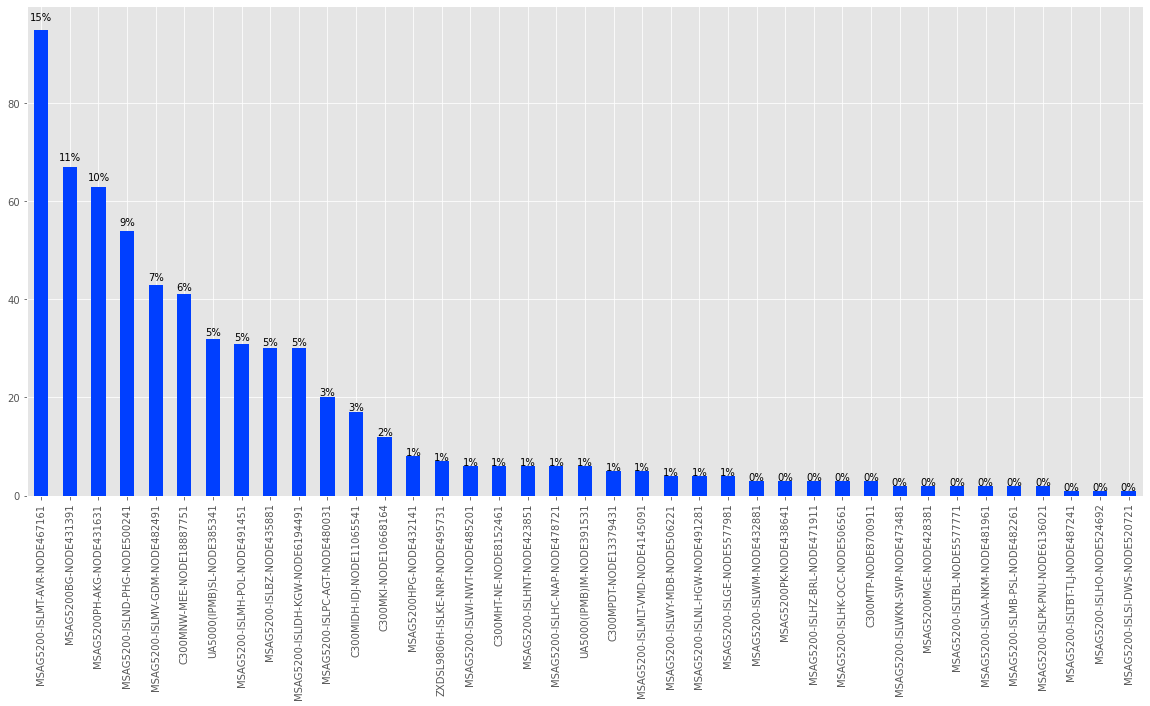

In [72]:
ax =cluster_3_peo["Location_Identifier"].value_counts().plot(kind='bar', figsize=(20,9))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### User locations of double play PV customers

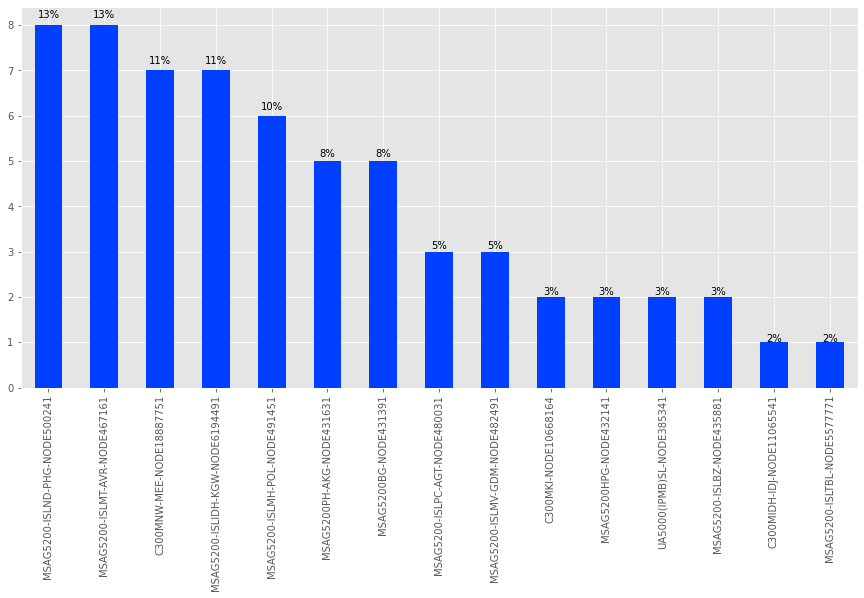

In [73]:
ax =cluster_3_peo_pv["Location_Identifier"].value_counts().plot(kind='bar', figsize=(15,7))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### User locations of double play BV customers

In [74]:
ax =cluster_3_bb_dp["Location_Identifier"].value_counts().plot(kind='bar', figsize=(15,7))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### IDD Usage among locations

<AxesSubplot:xlabel='Location_Identifier'>

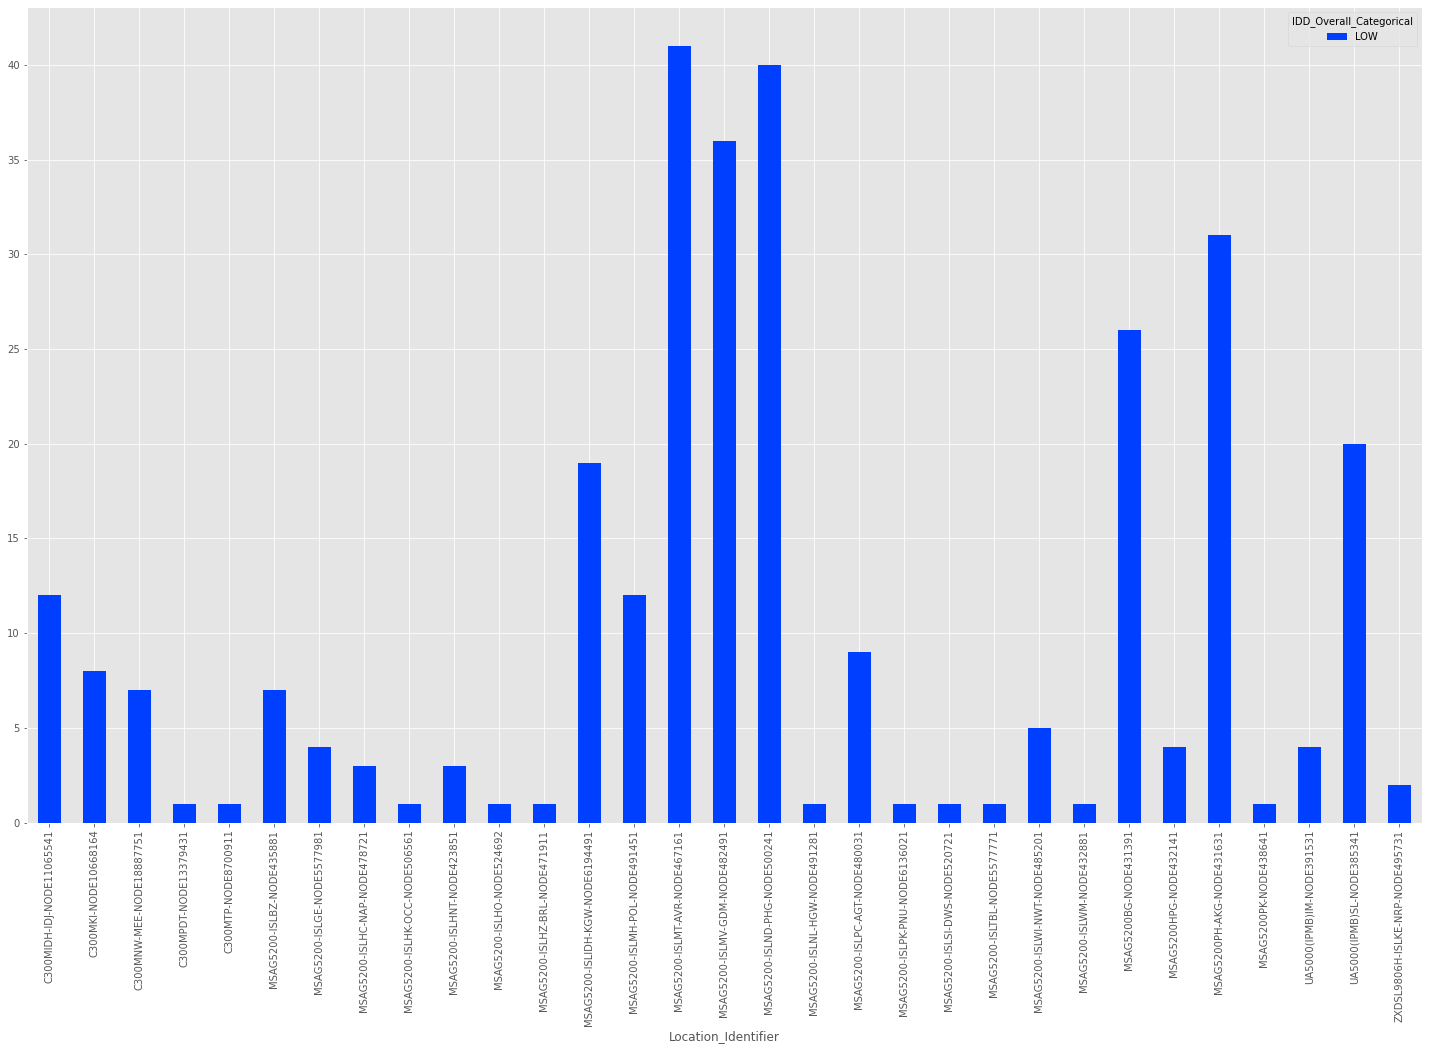

In [75]:
#ax =cluster_3[["IDD_Overall_Categorical","Location_Identifier"]].value_counts().plot(kind='bar', figsize=(15,7))

cluster_3[((cluster_3["Location_Identifier"] != "NO_INFO") & (cluster_3["IDD_Overall_Categorical"] != "NO_INFO"))].groupby(["Location_Identifier","IDD_Overall_Categorical"]).size().unstack().plot.bar(figsize=(25,15))

#### Peo TV Usage among locations

In [76]:
plt.figure(figsize=(20,8))
location_peo_df = cluster_3[["event_source.hash","Location_Identifier","PEO_TV_Scaled"]]
location_peo_df["Location_Identifier_Scaled"] = location_peo_df["Location_Identifier"].astype("category").cat.codes
loc_peo_bar_plot = sns.barplot(data=location_peo_df,x='Location_Identifier_Scaled', y='PEO_TV_Scaled')

loc_peo_bar_plot.set_xticklabels(location_peo_df["Location_Identifier"].unique(), 
                          rotation=90, 
                          horizontalalignment='right')

<ipython-input-76-8491d1f2b97d>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[Text(0, 0, 'MSAG5200-ISLWI-NWT-NODE485201'),
 Text(1, 0, 'MSAG5200-ISLHK-OCC-NODE506561'),
 Text(2, 0, 'MSAG5200-ISLIDH-KGW-NODE6194491'),
 Text(3, 0, 'C300MIDH-IDJ-NODE11065541'),
 Text(4, 0, 'MSAG5200-ISLHC-NAP-NODE478721'),
 Text(5, 0, 'MSAG5200-ISLND-PHG-NODE500241'),
 Text(6, 0, 'MSAG5200-ISLSI-DWS-NODE520721'),
 Text(7, 0, 'MSAG5200-ISLMV-GDM-NODE482491'),
 Text(8, 0, 'MSAG5200PK-NODE438641'),
 Text(9, 0, 'MSAG5200-ISLPK-PNU-NODE6136021'),
 Text(10, 0, 'MSAG5200-ISLHO-NODE524692'),
 Text(11, 0, 'C300MKI-NODE10668164'),
 Text(12, 0, 'MSAG5200-ISLMLT-VMD-NODE4145091'),
 Text(13, 0, 'MSAG5200-ISLMB-PSL-NODE482261'),
 Text(14, 0, 'MSAG5200-ISLVA-NKM-NODE481961'),
 Text(15, 0, 'MSAG5200-ISLTBT-TLJ-NODE487241'),
 Text(16, 0, 'MSAG5200-ISLWKN-SWP-NODE473481'),
 Text(17, 0, 'UA5000(IPMB)SL-NODE385341'),
 Text(18, 0, 'MSAG5200-ISLGE-NODE5577981'),
 Text(19, 0, 'MSAG5200-ISLPC-AGT-NODE480031'),
 Text(20, 0, 'MSAG5200HPG-NODE432141'),
 Text(21, 0, 'MSAG5200MGE-NODE428381'),
 Text(22, 0, 'Z

#### Popularity of PeoTV Packages among Locations

In [77]:
location_arr = cluster_3["Location_Identifier"].unique()

<ipython-input-78-cd7a36dd5659>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



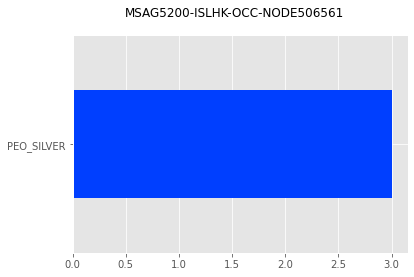

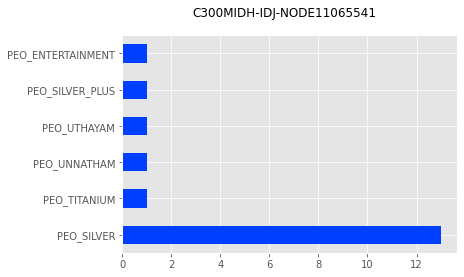

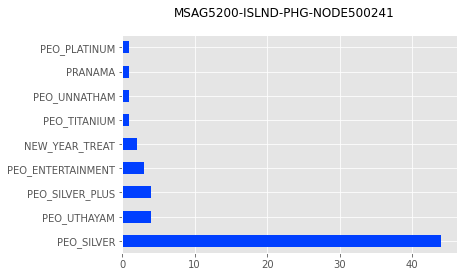

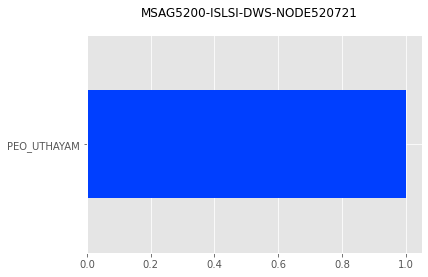

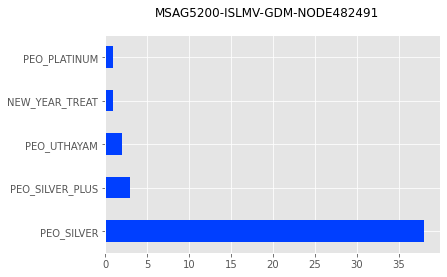

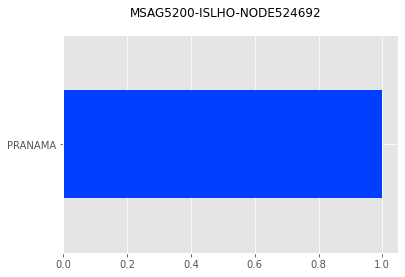

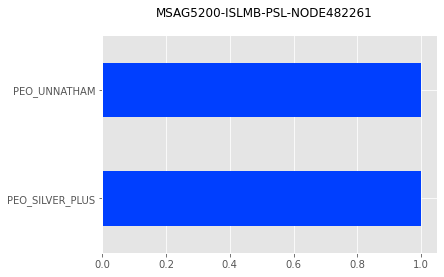

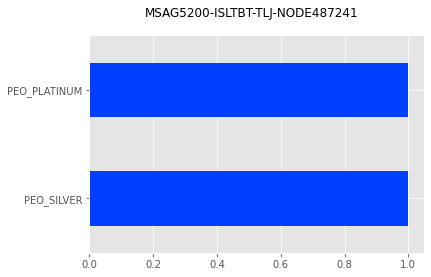

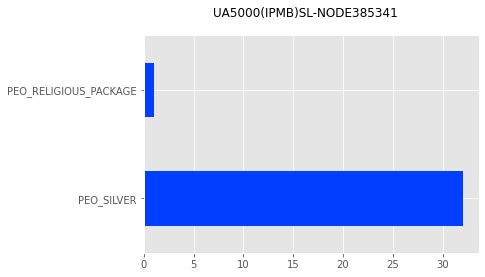

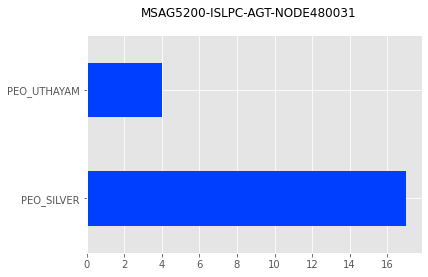

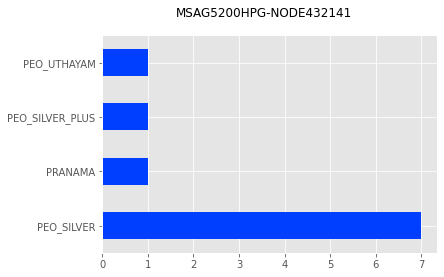

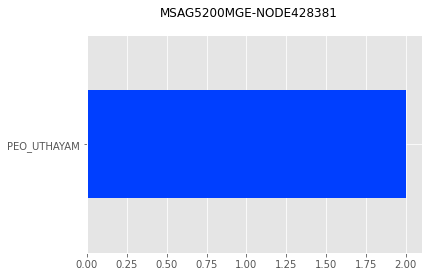

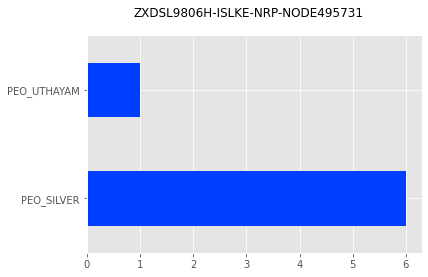

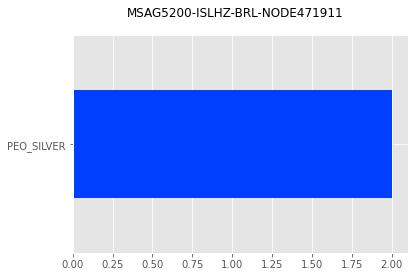

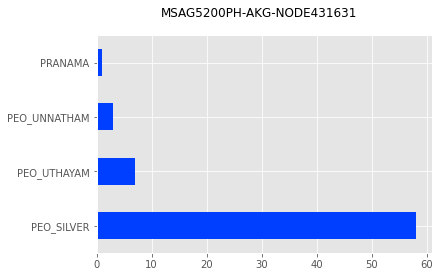

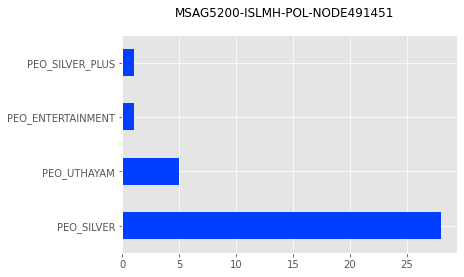

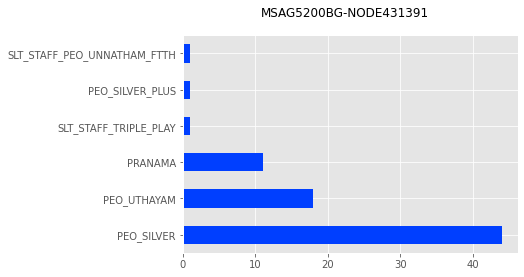

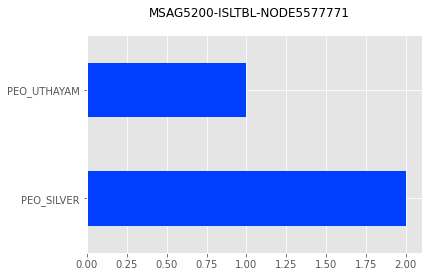

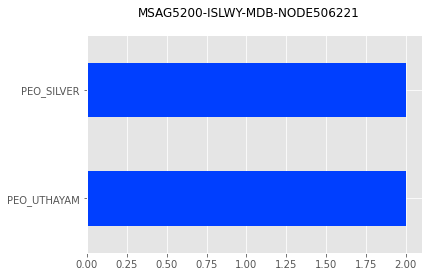

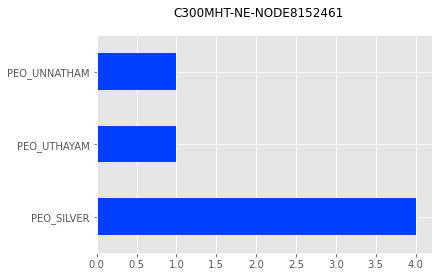

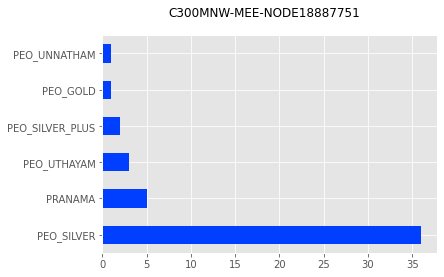

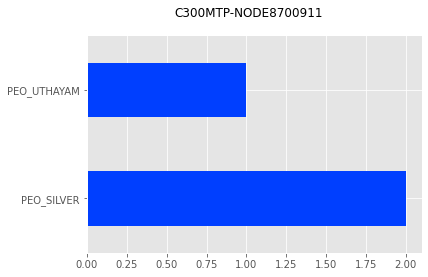

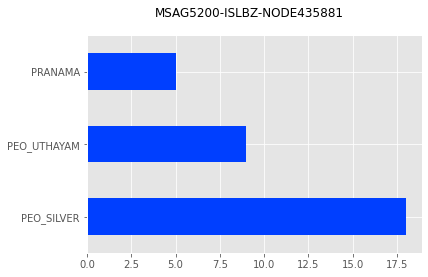

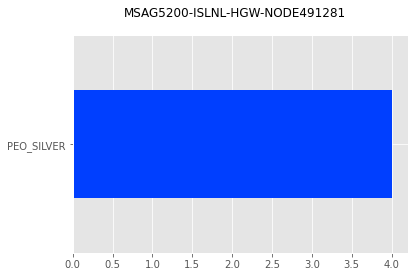

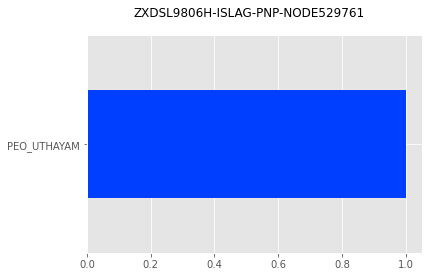

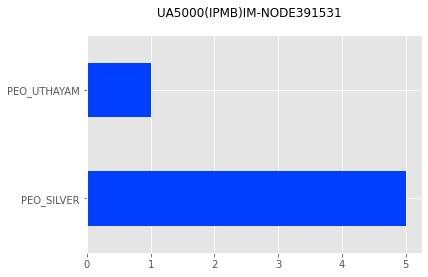

In [78]:
for loc in location_arr:
    user_loc_df = cluster_3[((cluster_3["Location_Identifier"]==loc) & (cluster_3["Peo_TV_Package"] != "NO_INFO"))]
    plt.figure(figsize=(6,4))
    plt.suptitle(loc)
    if (len(user_loc_df["Peo_TV_Package"].value_counts()) > 0):
        user_loc_df["Peo_TV_Package"].value_counts().plot(kind='barh', label=loc)

#### Popularity of PeoTV VAS Packages among Locations

<ipython-input-79-3ad0803c2378>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



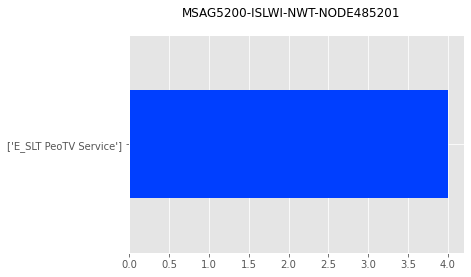

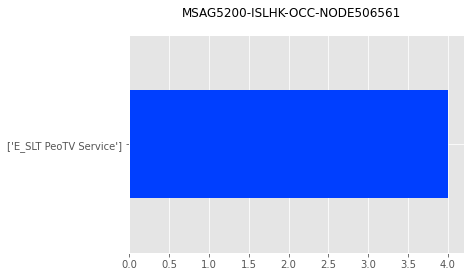

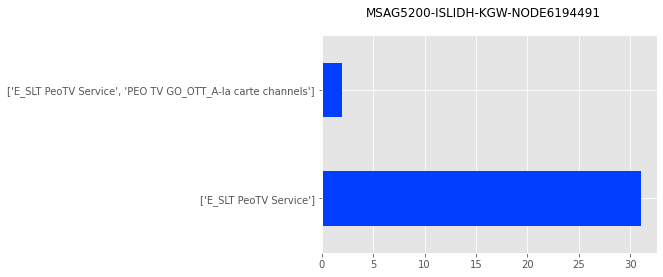

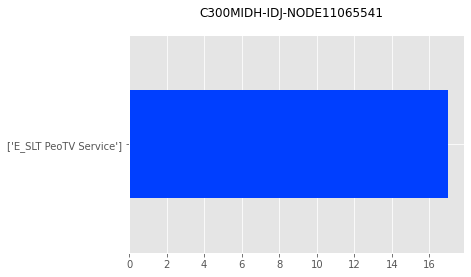

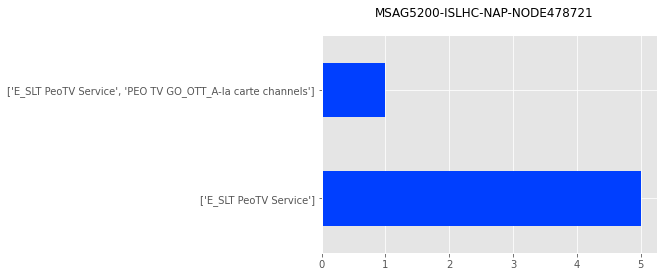

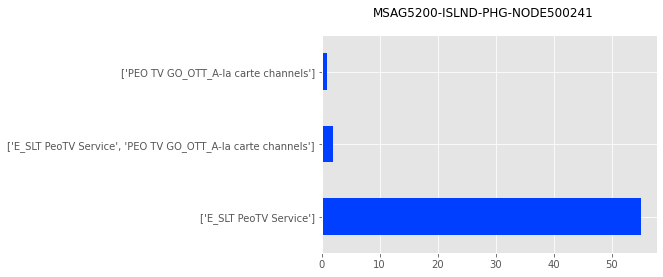

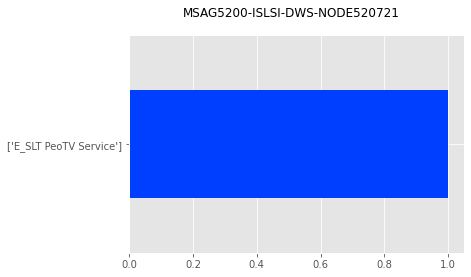

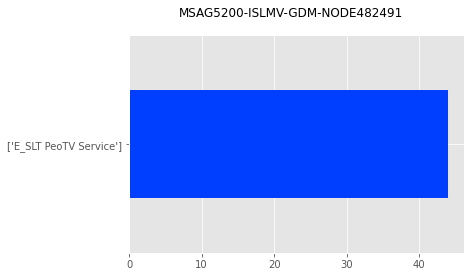

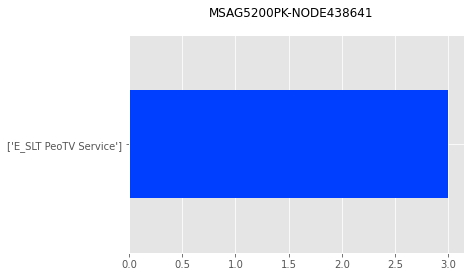

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

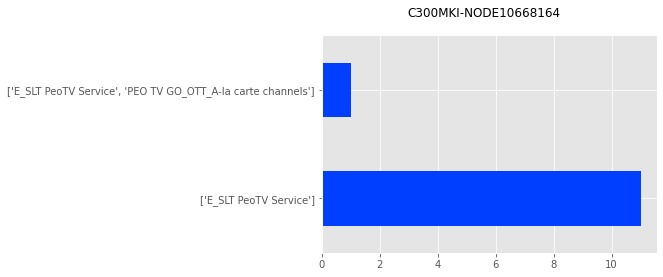

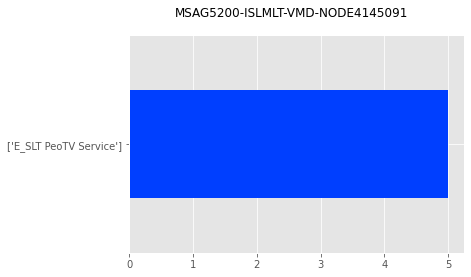

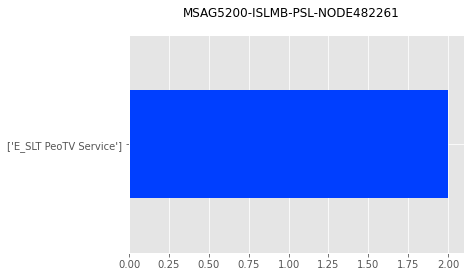

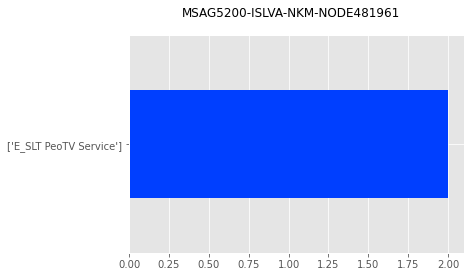

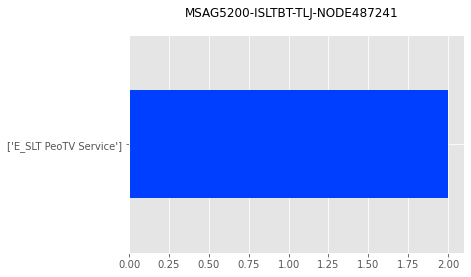

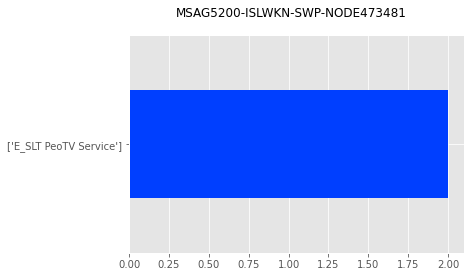

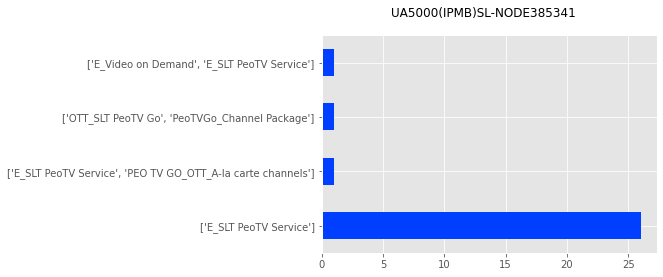

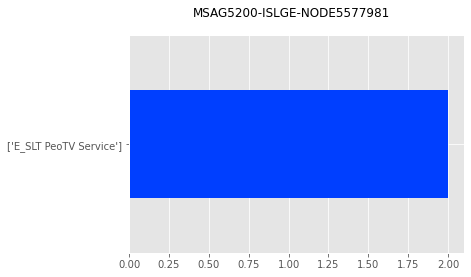

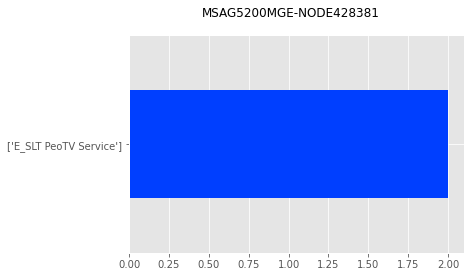

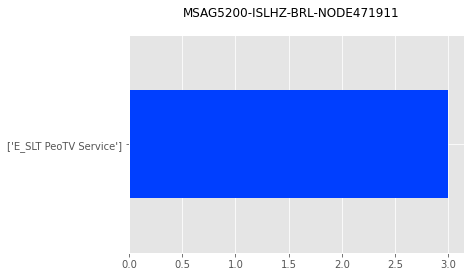

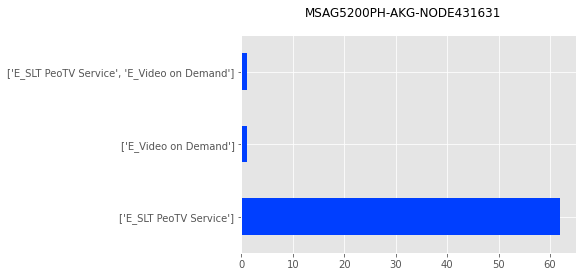

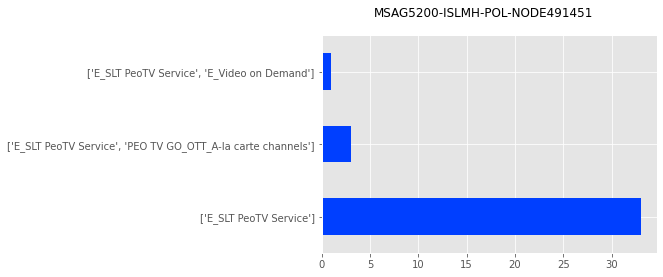

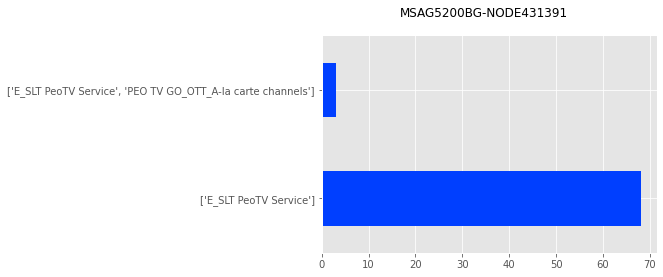

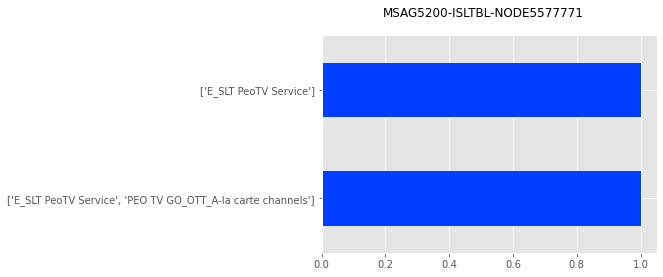

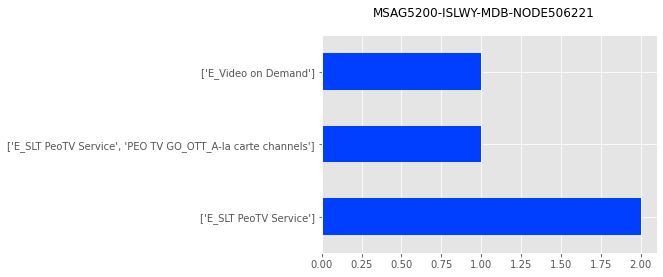

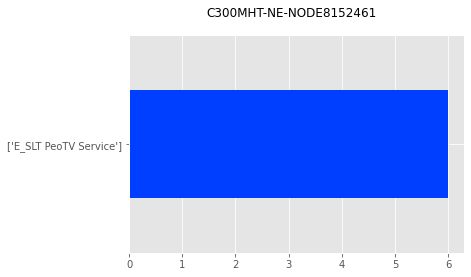

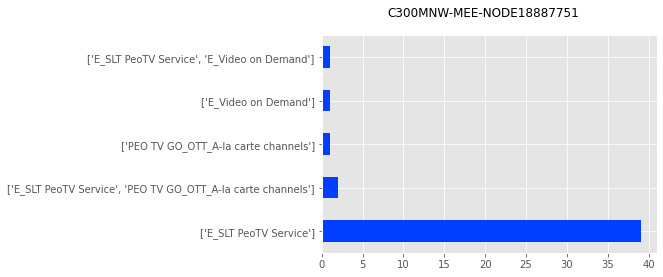

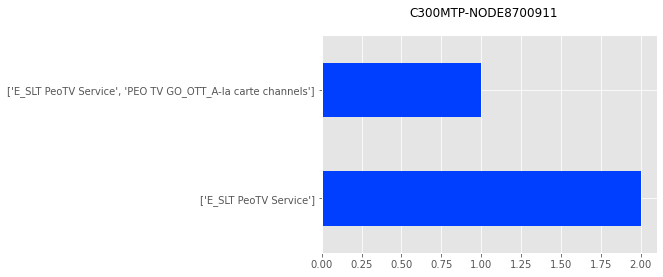

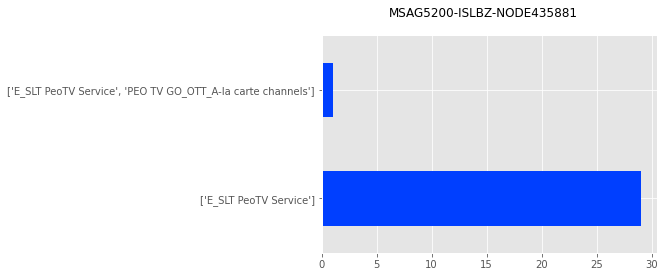

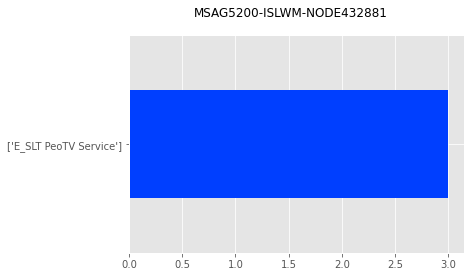

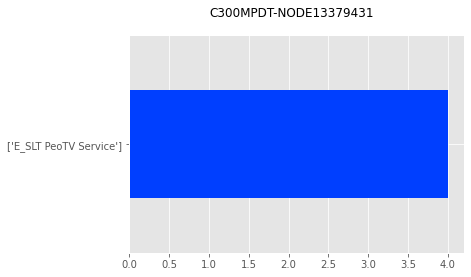

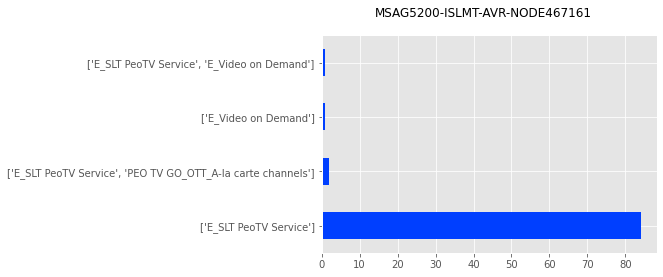

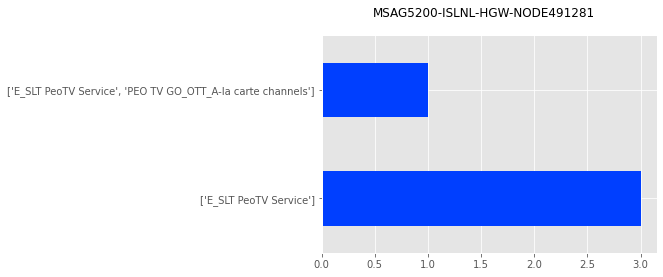

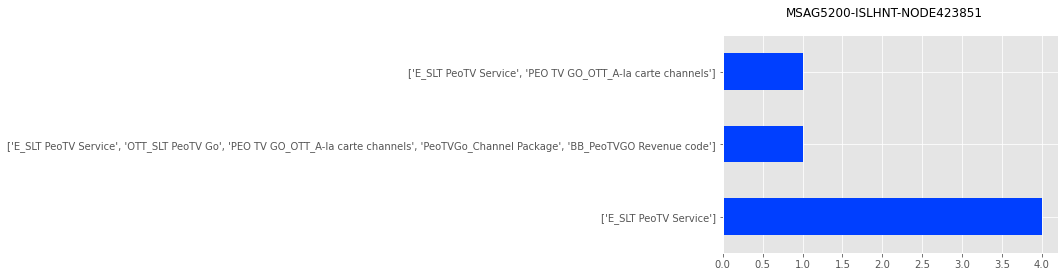

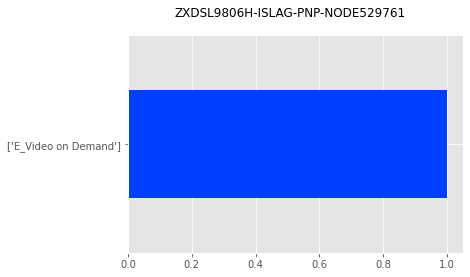

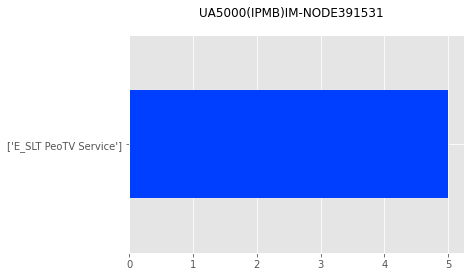

In [79]:
for loc in location_arr:
    user_loc_df = cluster_3[((cluster_3["Location_Identifier"]==loc) & (cluster_3["Peo_VAS_Package"] != "NO_INFO"))]
    plt.figure(figsize=(6,4))
    plt.suptitle(loc)
    if (len(user_loc_df["Peo_VAS_Package"].value_counts()) > 0):
        user_loc_df["Peo_VAS_Package"].value_counts().plot(kind='barh', label=loc)

#### Popularity of BB VAS Packages among Locations

<ipython-input-80-ac6d11e42e40>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

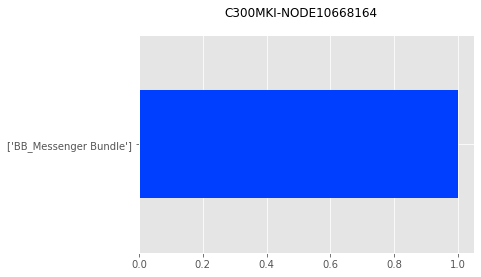

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

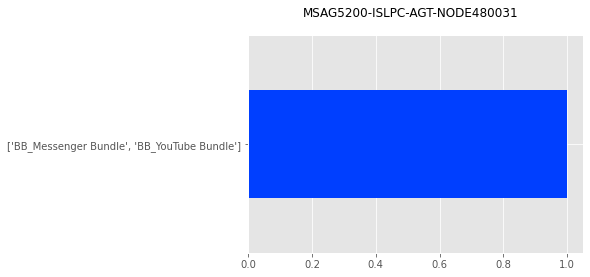

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

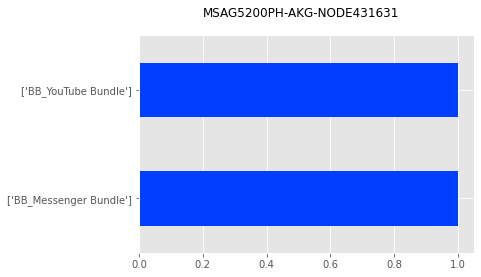

<Figure size 432x288 with 0 Axes>

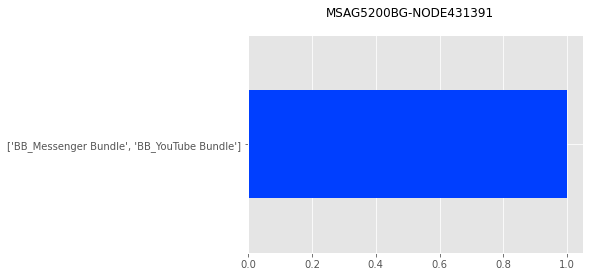

<Figure size 432x288 with 0 Axes>

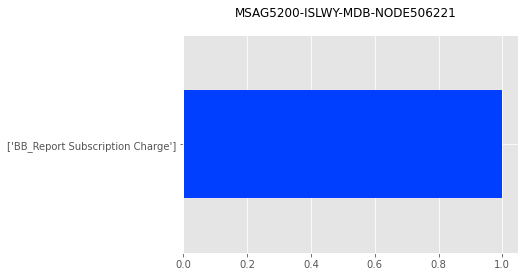

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [80]:
for loc in location_arr:
    user_loc_df = cluster_3[((cluster_3["Location_Identifier"]==loc) & (cluster_3["BB_VAS_Package"] != "NO_INFO"))]
    plt.figure(figsize=(6,4))
    plt.suptitle(loc)
    if (len(user_loc_df["BB_VAS_Package"].value_counts()) > 0):
        user_loc_df["BB_VAS_Package"].value_counts().plot(kind='barh', label=loc)

## Gender Analysis

<AxesSubplot:ylabel='GENDER'>

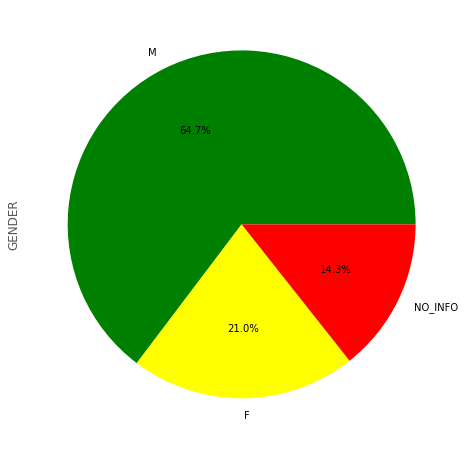

In [81]:
cluster_3["GENDER"].value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.1f%%',colors = ['green','yellow','red'])

In [82]:
cluster_3[(cluster_3["GENDER"]!= "NO_INFO")]["GENDER"].value_counts().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%',colors = ['green','yellow'])

<AxesSubplot:ylabel='GENDER'>

#### Subscription Types by Gender

<AxesSubplot:xlabel='Sub_Type'>

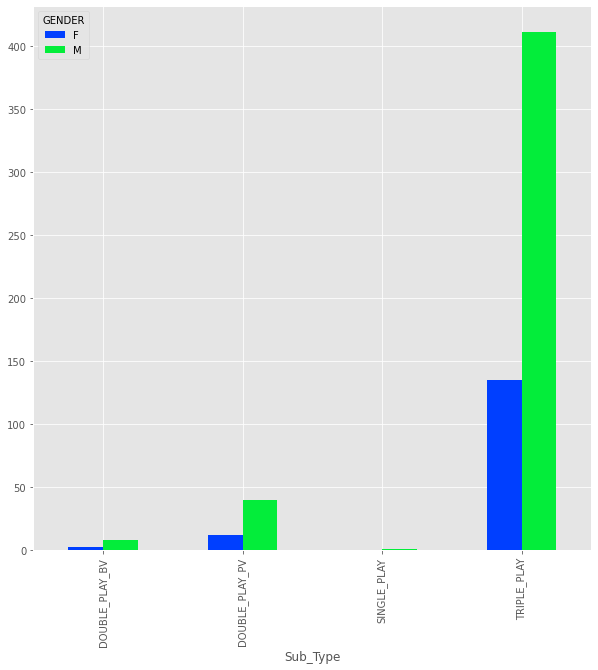

In [83]:
cluster_3[(cluster_3["GENDER"] != "NO_INFO")].groupby(["Sub_Type", "GENDER"]).size().unstack().plot.bar(figsize=(10,10))

### Service Usage on Gender

#### PeoTV Usage by Gender

array([<AxesSubplot:ylabel='PEO_TV_Scaled'>], dtype=object)

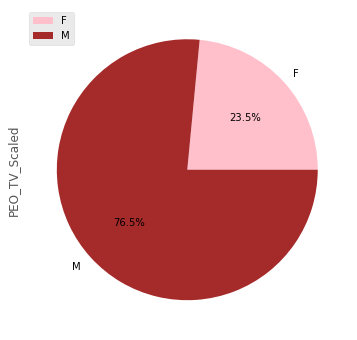

In [84]:
cluster_3[(cluster_3["GENDER"] != "NO_INFO")][["PEO_TV_Scaled", "GENDER"]].groupby("GENDER").sum().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%',colors=("pink","brown"), subplots=True)

#### BB Usage by Gender

array([<AxesSubplot:ylabel='BB_Scaled'>], dtype=object)

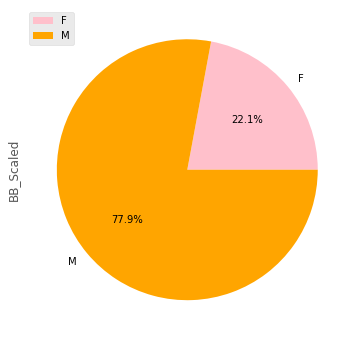

In [85]:
cluster_3[(cluster_3["GENDER"] != "NO_INFO")][["BB_Scaled", "GENDER"]].groupby("GENDER").sum().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%',colors=("pink","orange"), subplots=True)

#### IDD Usage by Gender

array([<AxesSubplot:ylabel='IDD_INCOMING_Scaled'>], dtype=object)

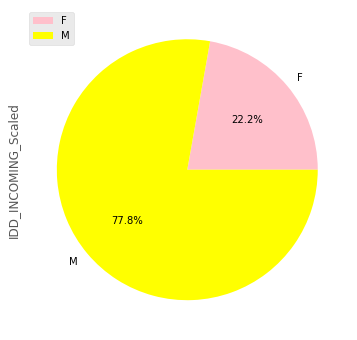

In [86]:
cluster_3[(cluster_3["GENDER"] != "NO_INFO")][["IDD_INCOMING_Scaled", "GENDER"]].groupby("GENDER").sum().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%',colors=("pink","yellow"), subplots=True)

#### Popular PeoTV Package

<AxesSubplot:xlabel='Peo_TV_Package'>

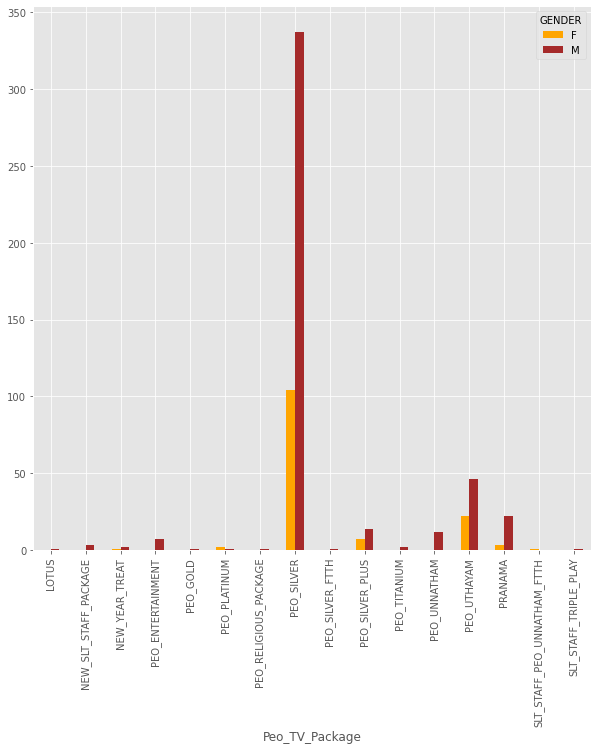

In [87]:
 cluster_3[((cluster_3["GENDER"] != "NO_INFO") &(cluster_3["Peo_TV_Package"] != "NO_INFO"))].groupby(["Peo_TV_Package", "GENDER"]).size().unstack().plot.bar(figsize=(10,10),color=("orange", "brown"))

## AGE Analysis

In [88]:
cluster_3["AGE"].describe()

count    609.000000
mean      55.131363
std       15.296924
min       21.000000
25%       44.000000
50%       55.000000
75%       66.000000
max      121.000000
Name: AGE, dtype: float64

In [89]:
bins = [0, 30,55,65,85,110]
cluster_3['AGE_Groups'] = pd.cut(cluster_3['AGE'], bins)

<ipython-input-89-a00b0f54b59b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:ylabel='AGE_Groups'>

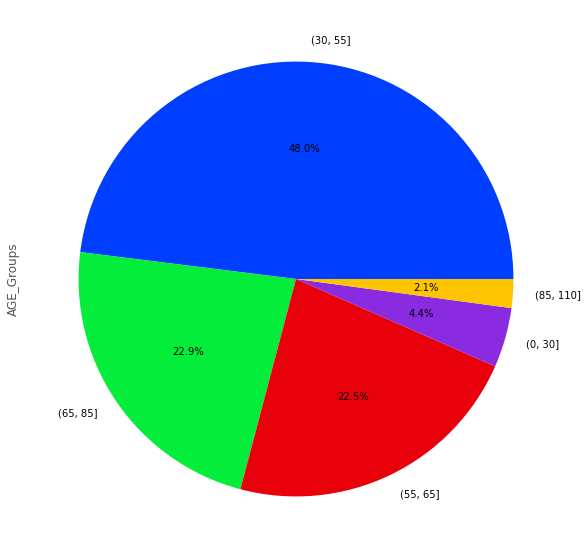

In [90]:
cluster_3["AGE_Groups"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

#### Subscription Types by Age Groups

<AxesSubplot:xlabel='Sub_Type'>

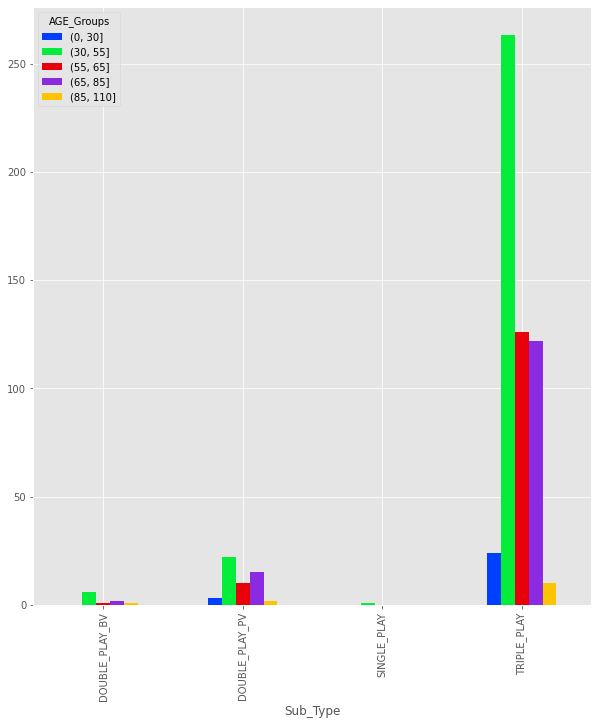

In [91]:
cluster_3.groupby(["Sub_Type", "AGE_Groups"]).size().unstack().plot.bar(figsize=(10,11))

### Service Usage by Age Groups

#### PeoTV Usage by Age Groups

array([<AxesSubplot:ylabel='PEO_TV_Scaled'>], dtype=object)

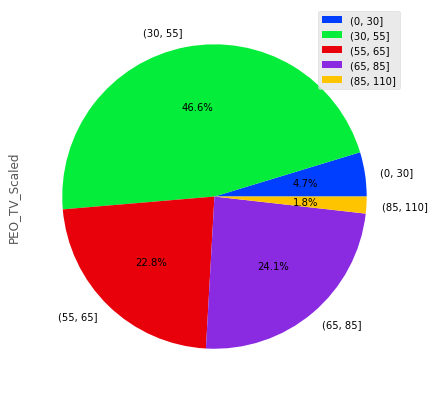

In [92]:
cluster_3[["PEO_TV_Scaled", "AGE_Groups"]].groupby("AGE_Groups").sum().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%', subplots=True)

#### BB Usage by Age Groups

array([<AxesSubplot:ylabel='BB_Scaled'>], dtype=object)

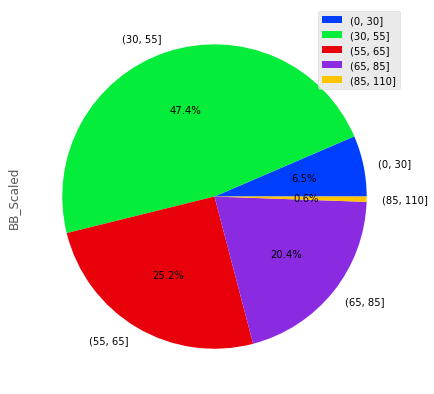

In [93]:
cluster_3[["BB_Scaled", "AGE_Groups"]].groupby("AGE_Groups").sum().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%',subplots=True)

#### IDD Usage by Age Groups

array([<AxesSubplot:ylabel='IDD_INCOMING_Scaled'>], dtype=object)

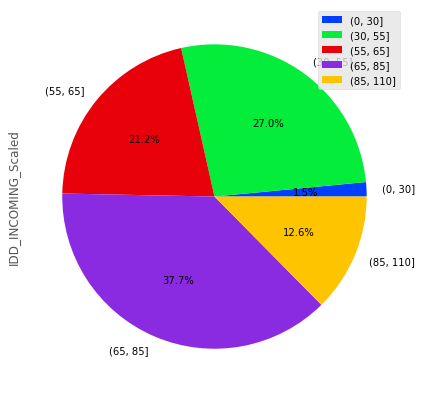

In [94]:
cluster_3[["IDD_INCOMING_Scaled", "AGE_Groups"]].groupby("AGE_Groups").sum().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%', subplots=True)

#### Popular PeoTV Package

<AxesSubplot:xlabel='Peo_TV_Package'>

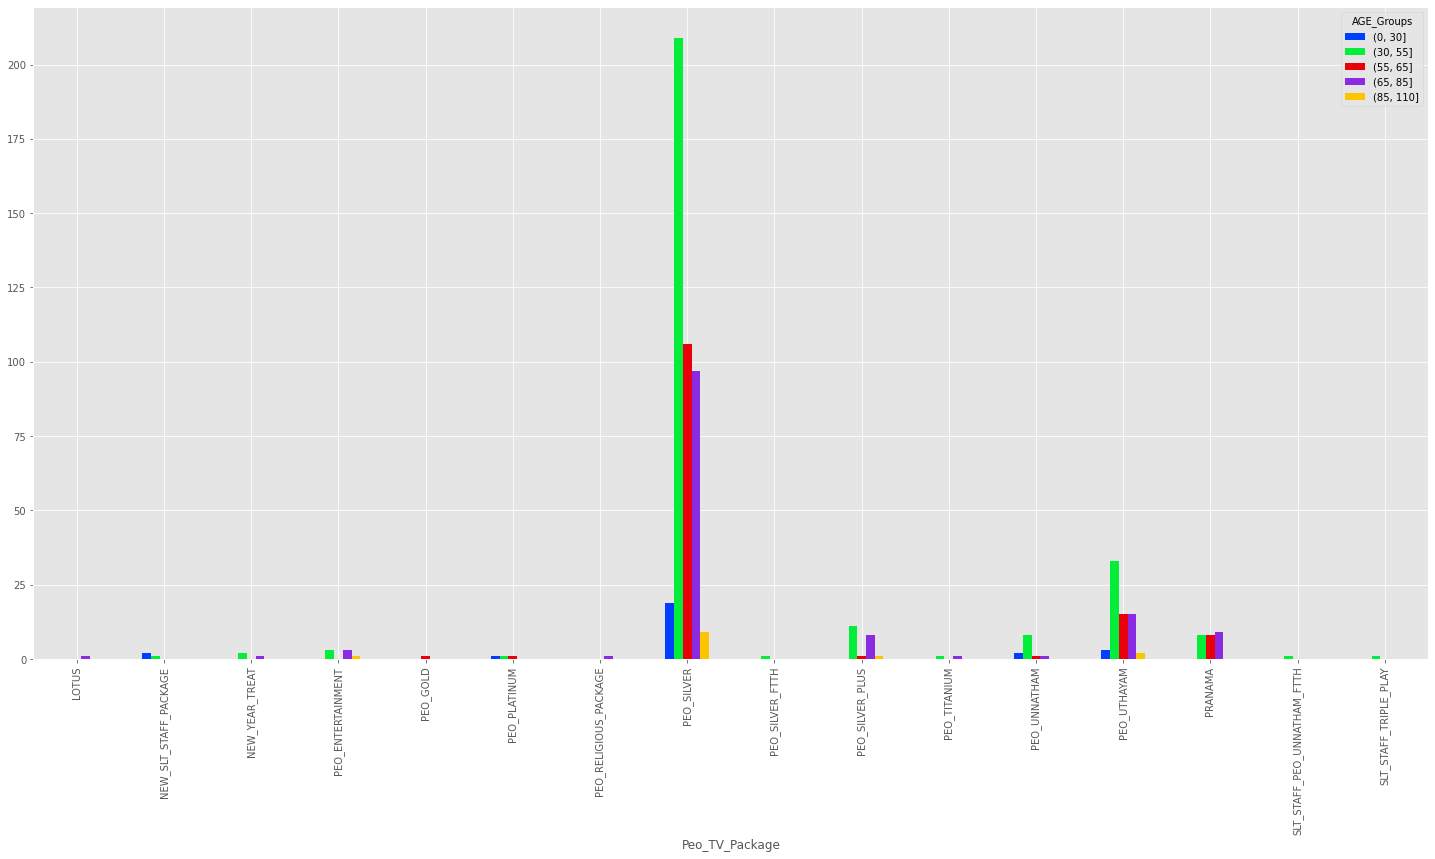

In [95]:
cluster_3[(cluster_3["Peo_TV_Package"] != "NO_INFO")].groupby(["Peo_TV_Package", "AGE_Groups"]).size().unstack().plot.bar(figsize=(25,12))

## ToDo
- Age and Gender wise VAS analysis

### Socio-economic factors

In [96]:
cluster_3["Having_Insurance"].value_counts()

NO_INFO    673
YES         38
Name: Having_Insurance, dtype: int64

<AxesSubplot:xlabel='Having_Insurance'>

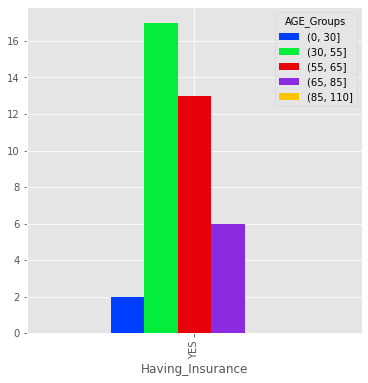

In [97]:
cluster_3[(cluster_3["Having_Insurance"] != "NO_INFO")].groupby(["Having_Insurance", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Insurance'>

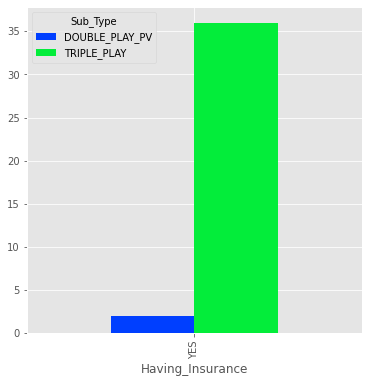

In [98]:
cluster_3[(cluster_3["Having_Insurance"] != "NO_INFO")].groupby(["Having_Insurance", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Insurance'>

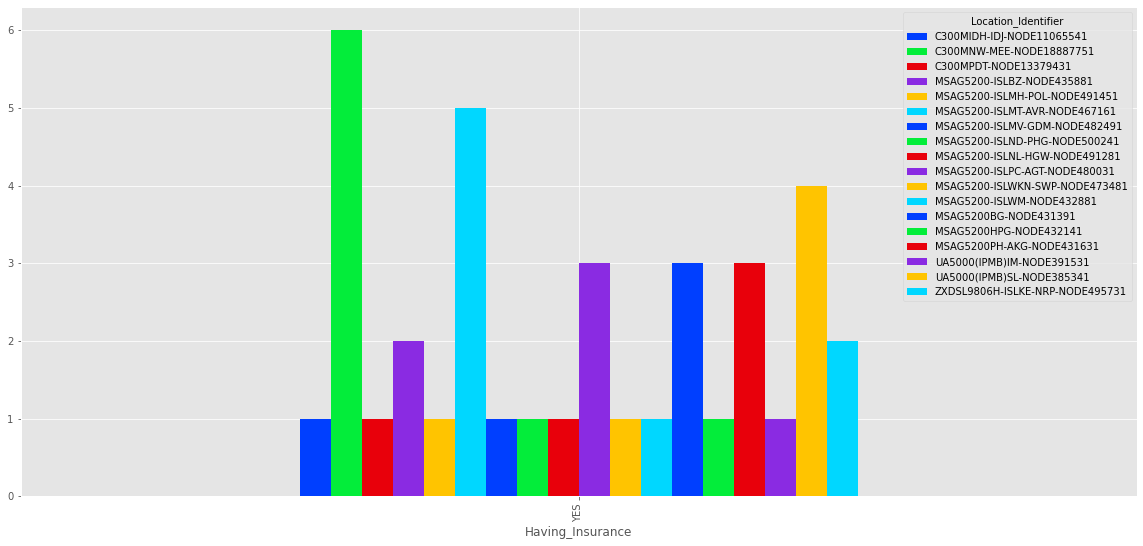

In [99]:
cluster_3[(cluster_3["Having_Insurance"] != "NO_INFO")].groupby(["Having_Insurance", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having Senior citizens

In [100]:
cluster_3["Having_Senior_Citizen"].value_counts(normalize=True)

NO_INFO    0.935302
YES        0.064698
Name: Having_Senior_Citizen, dtype: float64

<AxesSubplot:xlabel='Having_Senior_Citizen'>

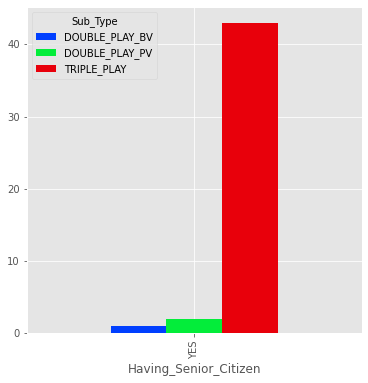

In [101]:
cluster_3[(cluster_3["Having_Senior_Citizen"] != "NO_INFO")].groupby(["Having_Senior_Citizen", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Senior_Citizen'>

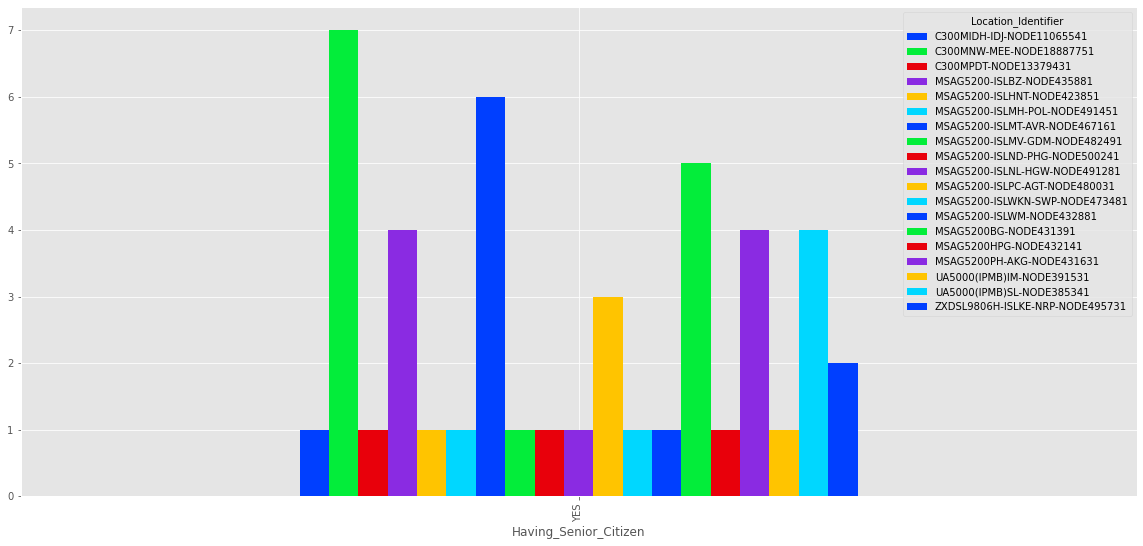

In [102]:
cluster_3[(cluster_3["Having_Senior_Citizen"] != "NO_INFO")].groupby(["Having_Senior_Citizen", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having a family member abroad

In [103]:
cluster_3["Having_Family_Member_Abroad"].value_counts(normalize=True)

NO_INFO    0.791842
YES        0.208158
Name: Having_Family_Member_Abroad, dtype: float64

<AxesSubplot:xlabel='Having_Family_Member_Abroad'>

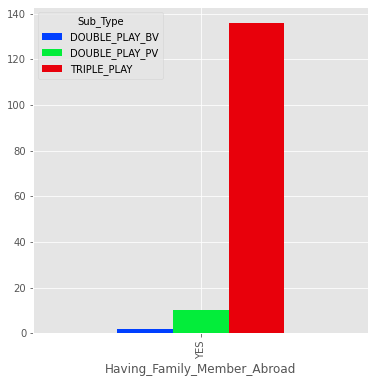

In [104]:
cluster_3[(cluster_3["Having_Family_Member_Abroad"] != "NO_INFO")].groupby(["Having_Family_Member_Abroad", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Family_Member_Abroad'>

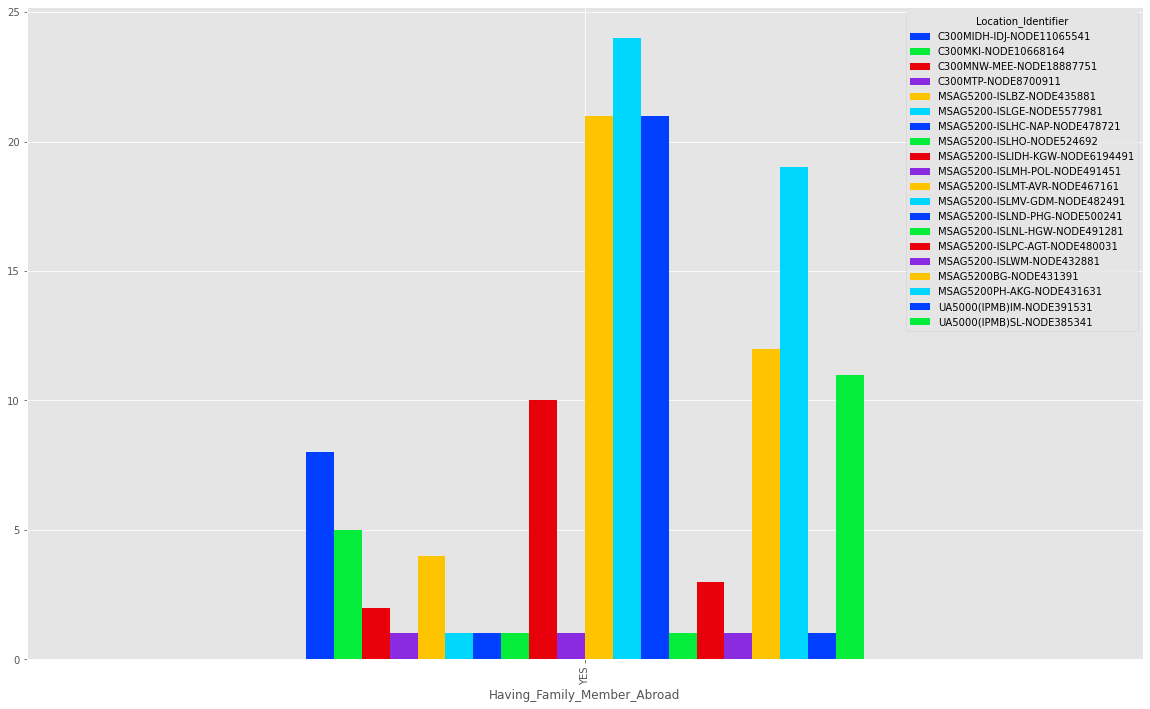

In [105]:
cluster_3[(cluster_3["Having_Family_Member_Abroad"] != "NO_INFO")].groupby(["Having_Family_Member_Abroad", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,12))

#### Having a working professional

In [106]:
cluster_3["Having_Working_Professionals"].value_counts(normalize=True)

NO_INFO    0.848101
YES        0.151899
Name: Having_Working_Professionals, dtype: float64

<AxesSubplot:xlabel='Having_Working_Professionals'>

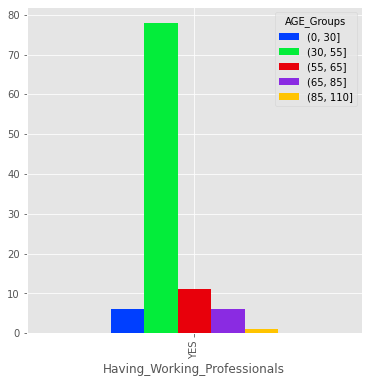

In [107]:
cluster_3[(cluster_3["Having_Working_Professionals"] != "NO_INFO")].groupby(["Having_Working_Professionals", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Working_Professionals'>

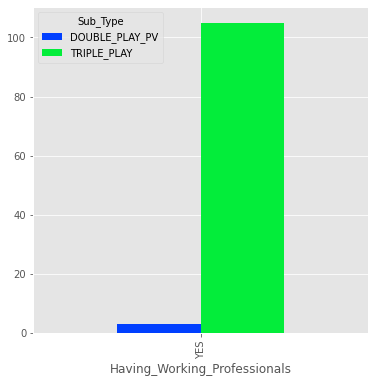

In [108]:
cluster_3[(cluster_3["Having_Working_Professionals"] != "NO_INFO")].groupby(["Having_Working_Professionals", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Working_Professionals'>

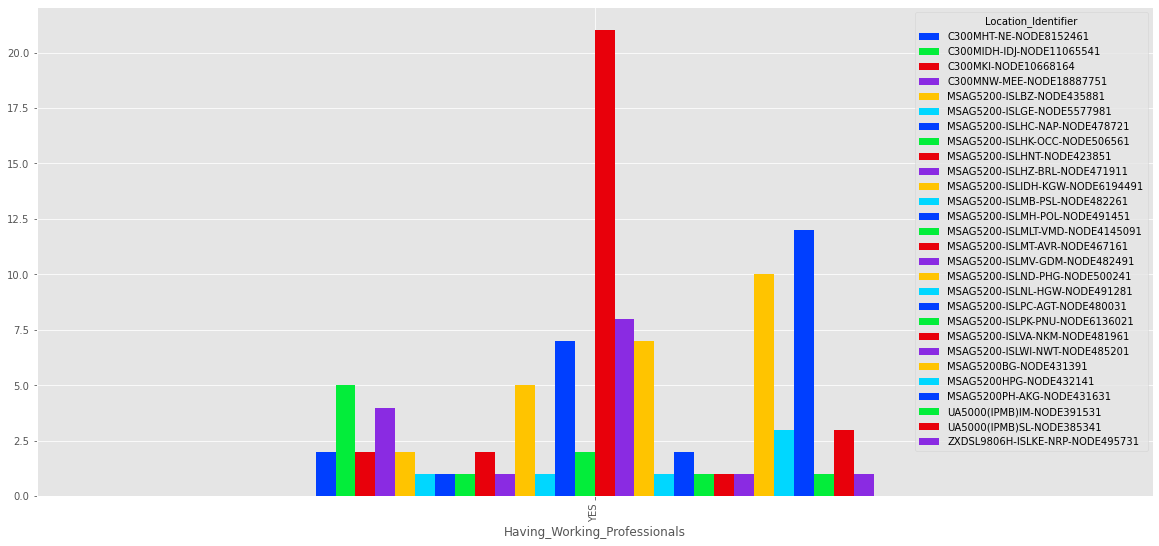

In [109]:
cluster_3[(cluster_3["Having_Working_Professionals"] != "NO_INFO")].groupby(["Having_Working_Professionals", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having Teenagers Students

In [110]:
cluster_3["Having_Teenagers_Students"].value_counts(normalize=True)

NO_INFO    0.897328
YES        0.102672
Name: Having_Teenagers_Students, dtype: float64

<AxesSubplot:xlabel='Having_Teenagers_Students'>

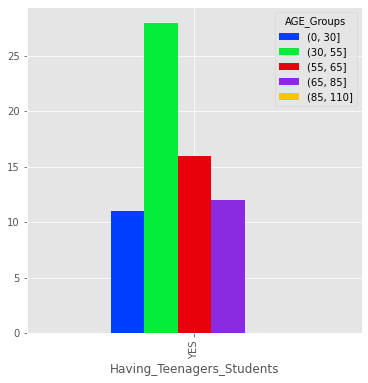

In [111]:
cluster_3[(cluster_3["Having_Teenagers_Students"] != "NO_INFO")].groupby(["Having_Teenagers_Students", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Teenagers_Students'>

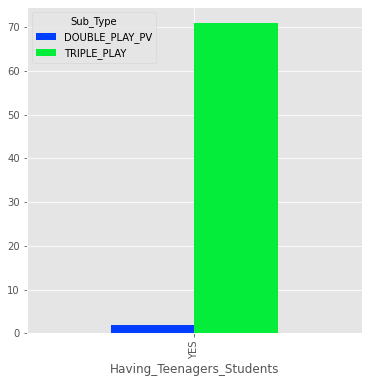

In [112]:
cluster_3[(cluster_3["Having_Teenagers_Students"] != "NO_INFO")].groupby(["Having_Teenagers_Students", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Teenagers_Students'>

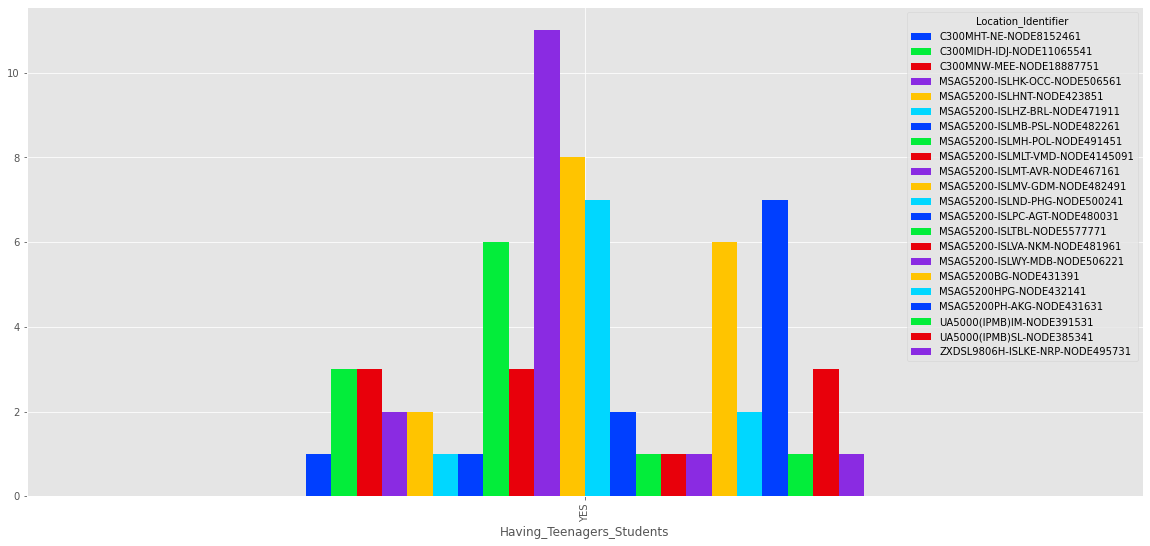

In [113]:
cluster_3[(cluster_3["Having_Teenagers_Students"] != "NO_INFO")].groupby(["Having_Teenagers_Students", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having a Tamil customer

In [114]:
cluster_3["Tamil_Customer"].value_counts(normalize=True)

NO_INFO    0.869198
YES        0.130802
Name: Tamil_Customer, dtype: float64

<AxesSubplot:xlabel='Tamil_Customer'>

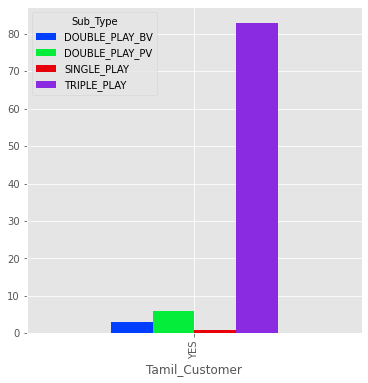

In [115]:
cluster_3[(cluster_3["Tamil_Customer"] != "NO_INFO")].groupby(["Tamil_Customer", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Tamil_Customer'>

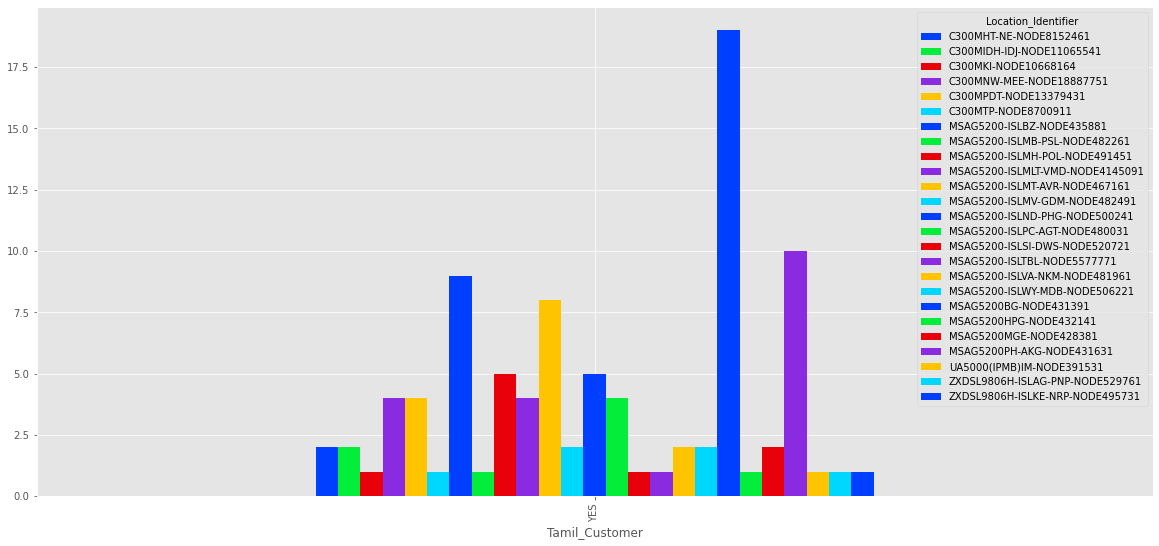

In [116]:
cluster_3[(cluster_3["Tamil_Customer"] != "NO_INFO")].groupby(["Tamil_Customer", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having Kids at Home

In [117]:
cluster_3["Having_Kids_at_Home"].value_counts(normalize=True)

NO_INFO    0.829817
YES        0.170183
Name: Having_Kids_at_Home, dtype: float64

<AxesSubplot:xlabel='Having_Kids_at_Home'>

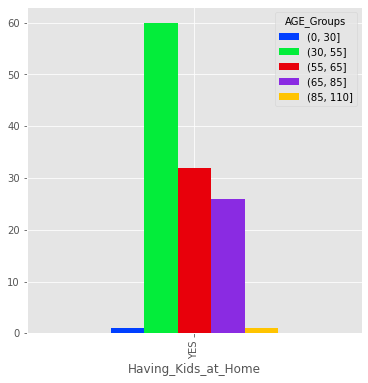

In [118]:
cluster_3[(cluster_3["Having_Kids_at_Home"] != "NO_INFO")].groupby(["Having_Kids_at_Home", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Kids_at_Home'>

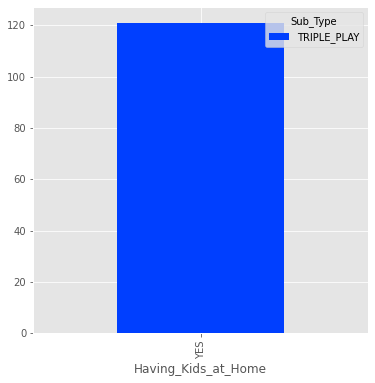

In [119]:
cluster_3[(cluster_3["Having_Kids_at_Home"] != "NO_INFO")].groupby(["Having_Kids_at_Home", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Kids_at_Home'>

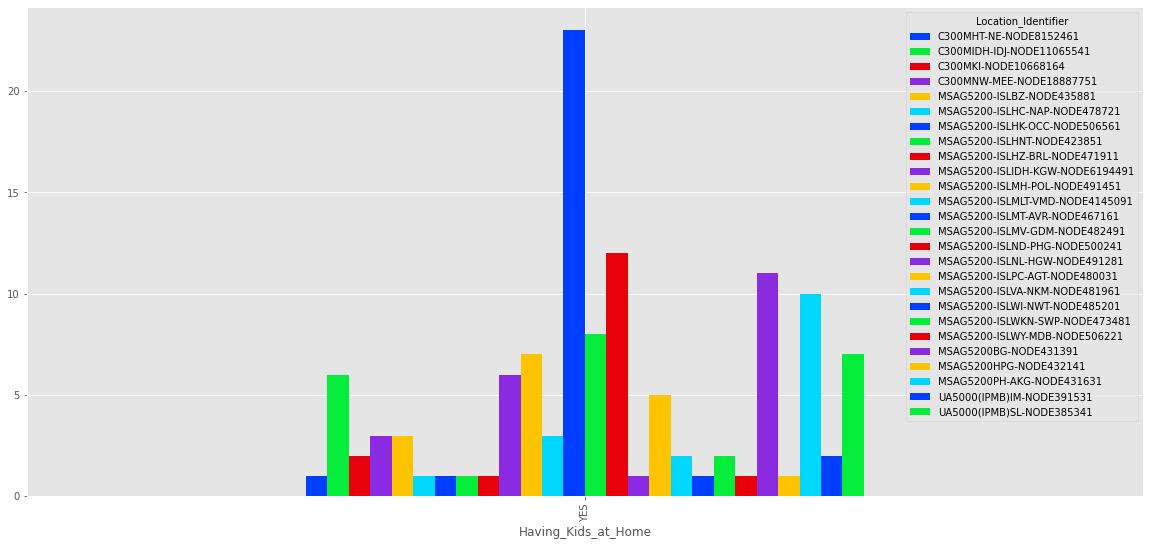

In [120]:
cluster_3[(cluster_3["Having_Kids_at_Home"] != "NO_INFO")].groupby(["Having_Kids_at_Home", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

### Identifying factors for recommending Packages for Cluster 3

#### Feasible locations to offer PeoTV

In [121]:
cluster_3_peo_loc = cluster_3[(cluster_3["Sub_Type"] == "TRIPLE_PLAY") | (cluster_3["Sub_Type"] == "DOUBLE_PLAY_PV")].groupby('Location_Identifier').count()["event_source.hash"]

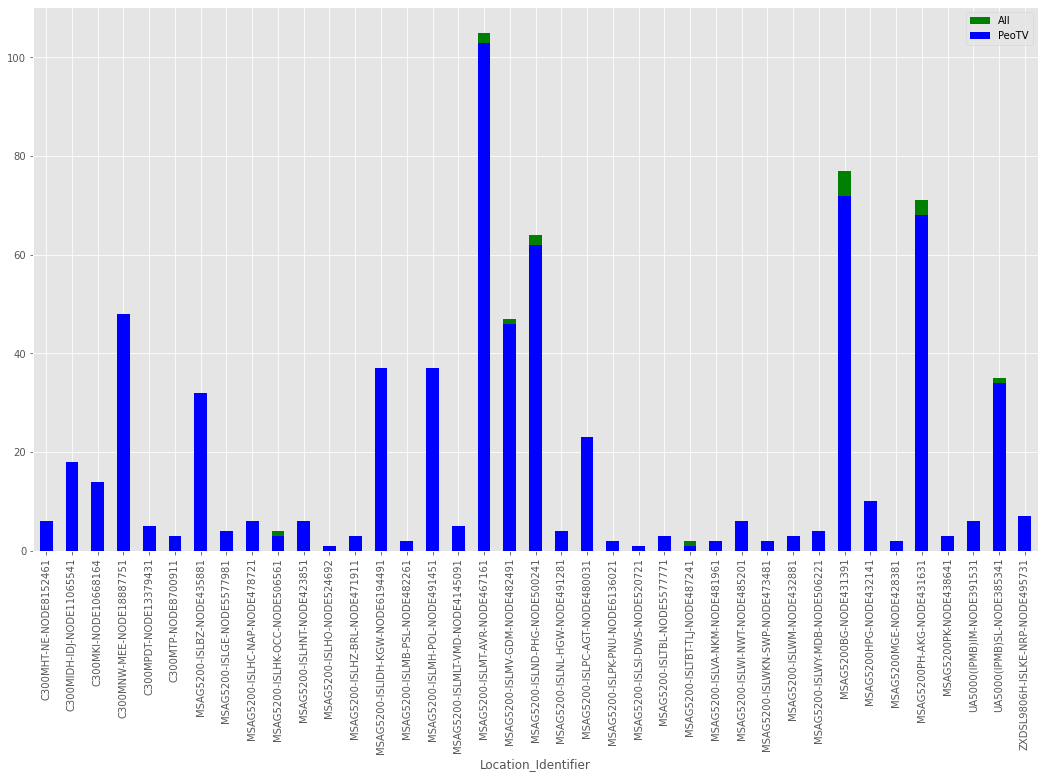

In [122]:
ax = cluster_3_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="green")
cluster_3_peo_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="blue")
plt.legend(["All","PeoTV"])

In [123]:
loc_precentage=(cluster_3_peo_loc/cluster_3_loc)*100

In [124]:
loc_precentage[(loc_precentage > 60)]

Location_Identifier
C300MHT-NE-NODE8152461             100.000000
C300MIDH-IDJ-NODE11065541          100.000000
C300MKI-NODE10668164               100.000000
C300MNW-MEE-NODE18887751           100.000000
C300MPDT-NODE13379431              100.000000
C300MTP-NODE8700911                100.000000
MSAG5200-ISLBZ-NODE435881          100.000000
MSAG5200-ISLGE-NODE5577981         100.000000
MSAG5200-ISLHC-NAP-NODE478721      100.000000
MSAG5200-ISLHK-OCC-NODE506561       75.000000
MSAG5200-ISLHNT-NODE423851         100.000000
MSAG5200-ISLHO-NODE524692          100.000000
MSAG5200-ISLHZ-BRL-NODE471911      100.000000
MSAG5200-ISLIDH-KGW-NODE6194491    100.000000
MSAG5200-ISLMB-PSL-NODE482261      100.000000
MSAG5200-ISLMH-POL-NODE491451      100.000000
MSAG5200-ISLMLT-VMD-NODE4145091    100.000000
MSAG5200-ISLMT-AVR-NODE467161       98.095238
MSAG5200-ISLMV-GDM-NODE482491       97.872340
MSAG5200-ISLND-PHG-NODE500241       96.875000
MSAG5200-ISLNL-HGW-NODE491281      100.000000
MSAG5200-ISLPC

#### Feasible locations to offer Broadband

In [125]:
cluster_3_bb_loc = cluster_3[(cluster_3["Sub_Type"] == "TRIPLE_PLAY") | (cluster_3["Sub_Type"] == "DOUBLE_PLAY_BV")].groupby('Location_Identifier').count()["event_source.hash"]

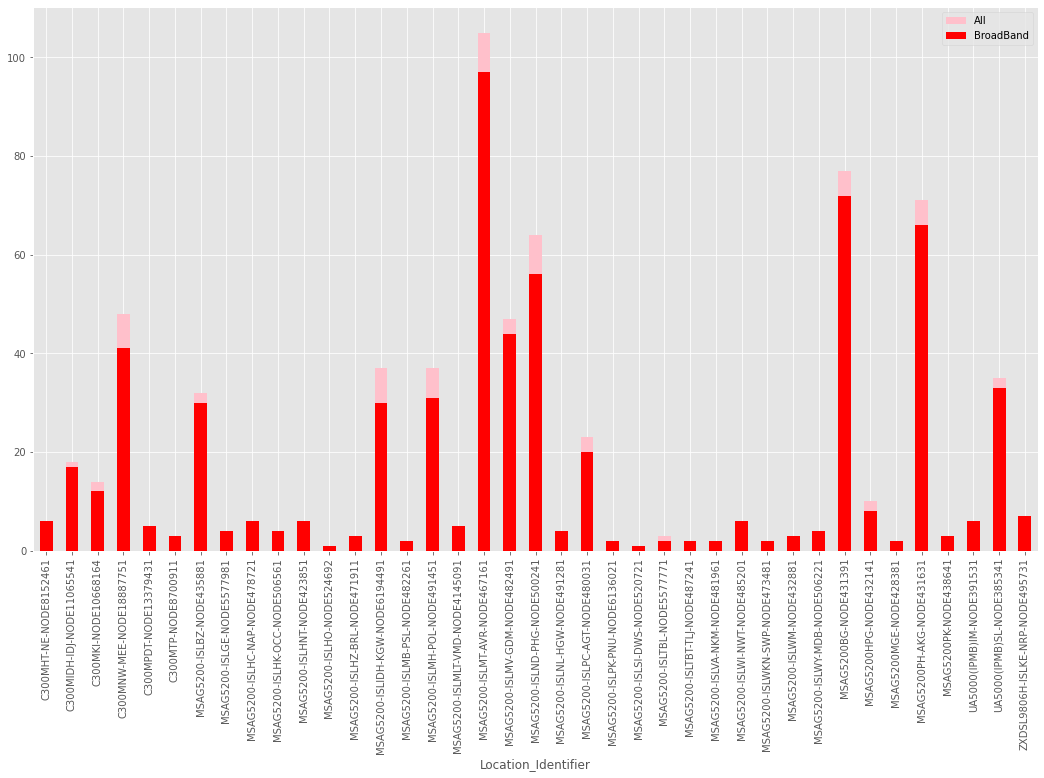

In [126]:
ax = cluster_3_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="pink")
cluster_3_bb_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="red")
plt.legend(["All","BroadBand"])

In [127]:
loc_precentage=(cluster_3_bb_loc/cluster_3_loc)*100

In [128]:
loc_precentage[(loc_precentage > 60)]

Location_Identifier
C300MHT-NE-NODE8152461             100.000000
C300MIDH-IDJ-NODE11065541           94.444444
C300MKI-NODE10668164                85.714286
C300MNW-MEE-NODE18887751            85.416667
C300MPDT-NODE13379431              100.000000
C300MTP-NODE8700911                100.000000
MSAG5200-ISLBZ-NODE435881           93.750000
MSAG5200-ISLGE-NODE5577981         100.000000
MSAG5200-ISLHC-NAP-NODE478721      100.000000
MSAG5200-ISLHK-OCC-NODE506561      100.000000
MSAG5200-ISLHNT-NODE423851         100.000000
MSAG5200-ISLHO-NODE524692          100.000000
MSAG5200-ISLHZ-BRL-NODE471911      100.000000
MSAG5200-ISLIDH-KGW-NODE6194491     81.081081
MSAG5200-ISLMB-PSL-NODE482261      100.000000
MSAG5200-ISLMH-POL-NODE491451       83.783784
MSAG5200-ISLMLT-VMD-NODE4145091    100.000000
MSAG5200-ISLMT-AVR-NODE467161       92.380952
MSAG5200-ISLMV-GDM-NODE482491       93.617021
MSAG5200-ISLND-PHG-NODE500241       87.500000
MSAG5200-ISLNL-HGW-NODE491281      100.000000
MSAG5200-ISLPC

## Cluster 3- Findings